<a href="https://colab.research.google.com/github/chris051091/Tesis_Maestria/blob/main/anomalias/src/Anomalias_palanquero_20h_7h_nuevodatospwv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install windrose

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta
import matplotlib.cm as cm
from functools import reduce
from math import cos, sin, atan, pi
from windrose import WindroseAxes
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_DADOS_EVENTOS = '/dados/'
PATH_ANOMALIAS = '/anomalias/'
NOMBRE_ESTACION = 'palanquero'
FILE_DATOS_ESTACION = 'eventos_palanquero_2.csv'

LISTA_VAR = ['temp', 'hum', 'pres','hum_especifica']
LISTA_PWV = ['pwv']
LISTA_VAR_10M = ['viento']
LISTA_PREC = ['prec']

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
FILES_TRATADOS = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR]
FILES_PWV = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}_nuevo.csv' for VAR in LISTA_PWV]
FILES_TRATADOS_10M = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR_10M]
FILES_TRATADOS_PREC = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_PREC]

PATH_FINAL_FIGURAS_ANOMALIAS = PATH_DRIVE + PATH_ANOMALIAS + NOMBRE_ESTACION

Cargando datos de Temp, Hum, Pres

In [4]:
dfList = []
for f in FILES_TRATADOS:
  df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';',
                )
  dfList.append(df)

In [5]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df = df.sort_values(by=['FECHA']).reset_index(drop = True)
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

Cargando datos de Vapor de Agua

In [6]:
dfList = []
PWV_columns = []
if FILES_PWV:

  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';',
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV = dfPWV.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV = dfPWV.loc[~dfPWV[var].isnull()].reset_index(drop = True)

  dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPWV = pd.DataFrame(columns = ['FECHA'])

<ipython-input-6-306ee08000b5>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()


In [7]:
dfPWV

FECHA_HORA        PWV                      FECHA
0      2011-01-01 00  48.345833  2011-01-01 00:00:00-05:00
1      2011-01-01 01  48.823333  2011-01-01 01:00:00-05:00
2      2011-01-01 02  49.310000  2011-01-01 02:00:00-05:00
3      2011-01-01 03  48.910000  2011-01-01 03:00:00-05:00
4      2011-01-01 09  46.825000  2011-01-01 09:00:00-05:00
...              ...        ...                        ...
40495  2017-12-31 19  52.657500  2017-12-31 19:00:00-05:00
40496  2017-12-31 20  53.710000  2017-12-31 20:00:00-05:00
40497  2017-12-31 21  55.233333  2017-12-31 21:00:00-05:00
40498  2017-12-31 22  56.612500  2017-12-31 22:00:00-05:00
40499  2017-12-31 23  57.475000  2017-12-31 23:00:00-05:00

[40500 rows x 3 columns]

## Datos de PWV sin agrupar por hora (Formato de 5 minutos)

In [8]:
dfList = []
PWV_columns = []
if FILES_PWV:

  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';',
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV_5m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV_5m = dfPWV_5m.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV_5m['FECHA_HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV_5m = dfPWV_5m.loc[~dfPWV_5m[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

else:
  dfPWV_5m = pd.DataFrame(columns = ['FECHA'])

In [9]:
dfPWV_5m

FECHA    PWV     FECHA_HORA
0       2011-01-01 00:00:00-05:00  48.13  2011-01-01 00
1       2011-01-01 00:05:00-05:00  48.16  2011-01-01 00
2       2011-01-01 00:10:00-05:00  48.19  2011-01-01 00
3       2011-01-01 00:15:00-05:00  48.20  2011-01-01 00
4       2011-01-01 00:20:00-05:00  48.25  2011-01-01 00
...                           ...    ...            ...
479210  2017-12-31 23:35:00-05:00  57.51  2017-12-31 23
479211  2017-12-31 23:40:00-05:00  57.53  2017-12-31 23
479212  2017-12-31 23:45:00-05:00  57.55  2017-12-31 23
479213  2017-12-31 23:50:00-05:00  57.57  2017-12-31 23
479214  2017-12-31 23:55:00-05:00  57.57  2017-12-31 23

[479215 rows x 3 columns]

## Cargando datos de Vientos

$ \theta_p  = arctan(U_p / V_p) $ Direccíon del viento promedio

In [10]:
dfList = []
for f in FILES_TRATADOS_10M:
  dfaux = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';',
                )
  dfList.append(dfaux)

In [11]:
df10m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)

df10m['FECHA_HORA'] = df10m['FECHA'].apply(lambda x: x[0:13])
df10m['X_VIENTO'] = df10m['VELVIENTO'] * np.sin(np.deg2rad(df10m['DIRECVIENTO'] - 180))
df10m['Y_VIENTO'] = df10m['VELVIENTO'] * np.cos(np.deg2rad(df10m['DIRECVIENTO'] - 180))

dfViento = df10m.copy()

df10m = df10m.groupby('FECHA_HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean' }).reset_index()
df10m['HORA'] = df10m['FECHA_HORA'].apply(lambda x: x[11:13])
df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

In [12]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00
...              ...       ...       ...  ...                        ...
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00

[41348 rows x 5 columns]

## Cargando datos de precipitación

In [13]:
dfList = []
PREC_columns = []
if FILES_TRATADOS_PREC:

  for f in FILES_TRATADOS_PREC:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';',
                  )
    dfList.append(dfp)
    PREC_columns += [col for col in dfp if col != 'FECHA']


  dfPrec = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPrec = dfPrec.sort_values(by=['FECHA']).reset_index(drop = True)

  # dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PREC_columns:
    dfPrec = dfPrec.loc[~dfPrec[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPrec = pd.DataFrame(columns = ['FECHA'])



In [14]:
dfPrec

FECHA  PREC
0       2011-01-01 00:10:00-05:00   0.0
1       2011-01-01 00:20:00-05:00   0.0
2       2011-01-01 00:30:00-05:00   0.0
3       2011-01-01 00:40:00-05:00   0.0
4       2011-01-01 00:50:00-05:00   0.0
...                           ...   ...
278093  2017-12-31 23:10:00-05:00   0.0
278094  2017-12-31 23:20:00-05:00   0.0
278095  2017-12-31 23:30:00-05:00   0.0
278096  2017-12-31 23:40:00-05:00   0.0
278097  2017-12-31 23:50:00-05:00   0.0

[278098 rows x 2 columns]

## Cruzamiento de datos de Temp, hum y pres con PWV

In [15]:
dfDatos = pd.merge(df[['FECHA', 'TEMP', 'HUM', 'PRESION', 'HUM_ESPECIFICA']], dfPWV[['FECHA', 'PWV']], on = 'FECHA', how = 'outer')
dfDatos['HORA'] = dfDatos['FECHA'].apply(lambda x: x[11:13])

dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean.columns if col != 'HORA']
for col in columns_mean:
  dfmean = dfmean.rename(columns={col : f'{col}_mean'})

dfmean

<ipython-input-15-6e882078fe68>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)


HORA  TEMP_mean   HUM_mean  PRESION_mean  HUM_ESPECIFICA_mean   PWV_mean
0    00  24.602023  94.585927    990.357252            18.784561  55.665978
1    01  24.310280  95.313859    989.928955            18.623648  55.365001
2    02  24.065277  95.796044    989.517105            18.418836  54.820929
3    03  23.824669  96.340862    989.360551            18.286400  54.352282
4    04  23.624545  96.599726    989.524463            18.089357  53.935836
5    05  23.476396  96.941017    989.957486            18.015720  53.615639
6    06  23.392489  97.098294    990.549096            17.900100  53.493620
7    07  24.552886  94.934080    991.286165            18.849598  53.355961
8    08  26.403856  87.091133    991.815086            19.431882  53.046632
9    09  28.146848  79.782090    991.753458            19.611713  52.836865
10   10  29.641552  74.060819    991.236758            19.780066  52.619752
11   11  30.927965  68.712103    990.289187            19.654454  52.311196
12   12  31.897813  65.160628    989.067927            19.448427  51.925340
13   13  32.714355  62.450739    987.683044            19.462854  51.737355
14   14  33.094138  60.712422    986.358197            19.259091  51.903615
15   15  33.183180  60.594078    985.435393            19.342260  52.090380
16   16  32.781034  62.090068    985.062162            19.428284  52.364498
17   17  31.481422  67.961812    985.331253            19.875229  52.832476
18   18  28.938304  79.054181    986.149731            20.184835  53.303802
19   19  27.201797  85.991962    987.268009            19.984187  54.618103
20   20  26.266611  89.772118    988.472887            19.779092  54.990743
21   21  25.801595  91.668005    989.523926            19.632160  55.391234
22   22  25.378002  92.759012    990.221483            19.356549  55.641028
23   23  24.961304  93.902537    990.489129            19.104964  55.733583

## Cargando Df de los eventos

In [16]:
dfEventos = pd.read_csv(PATH_DRIVE + PATH_DADOS_EVENTOS + FILE_DATOS_ESTACION,
                 sep = ';'
                )
dfEventos = dfEventos.sort_values(by='DATE_MIN_T').reset_index(drop = True)
dfEventos['FECHA'] = pd.to_datetime(dfEventos['DATE_MIN_T'], format='%Y-%m-%d %H:%M').dt.tz_localize('America/Bogota')
dfEventos['FECHA_MIN'] = dfEventos['FECHA'].dt.round('10min')
dfEventos['FECHA'] = dfEventos['FECHA'].dt.round('H')
dfEventos = dfEventos[['FECHA', 'FECHA_MIN', 'MIN_T', 'LON', 'LAT']]
dfEventos

FECHA                 FECHA_MIN  MIN_T     LON    LAT
0   2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627
1   2011-02-03 23:00:00-05:00 2011-02-03 23:20:00-05:00  195.6 -74.836  5.627
2   2011-04-04 23:00:00-05:00 2011-04-04 22:40:00-05:00  193.8 -74.693  5.627
3   2011-04-09 23:00:00-05:00 2011-04-09 22:40:00-05:00  197.0 -74.693  5.627
4   2011-04-24 03:00:00-05:00 2011-04-24 02:40:00-05:00  200.5 -74.836  5.627
..                        ...                       ...    ...     ...    ...
123 2017-10-24 03:00:00-05:00 2017-10-24 03:20:00-05:00  196.6 -74.693  5.627
124 2017-11-10 23:00:00-05:00 2017-11-10 23:20:00-05:00  208.2 -74.693  5.484
125 2017-11-11 00:00:00-05:00 2017-11-10 23:40:00-05:00  202.6 -74.836  5.341
126 2017-12-09 21:00:00-05:00 2017-12-09 20:40:00-05:00  208.9 -74.693  5.484
127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836  5.484

[128 rows x 5 columns]

# Cargando Eventos e encontrando intervalo n horas antes y después

In [17]:
funtime = lambda x, hour : [x + timedelta(hours = h) for h in (range(0, hour+1) if hour > 0 else range(hour, 0))]

# [base - datetime.timedelta(days=x) for x in range(numdays)]
dfEventAn = dfEventos.copy()
# pd.set_option('display.max_colwidth', None)

# ==================================
int_horas = 8
intervalo_minutes_samples_10m = 10
intervalo_minutes_samples_5m = 5
int_minutes = int_horas * 6 * intervalo_minutes_samples_10m
int_minutes_5m = int_horas * 12 * intervalo_minutes_samples_5m

# ==================================
dfEventAn['FECHA_ANTES'] = dfEventAn['FECHA'].apply(funtime, hour = -int_horas)
dfEventAn['FECHA_DESPUES'] = dfEventAn['FECHA'].apply(funtime, hour = int_horas)
dfEventAn['FECHA_INTERVALO'] = dfEventAn['FECHA_ANTES'] + dfEventAn['FECHA_DESPUES']
dfEventAn = dfEventAn.drop(columns=['FECHA_ANTES', 'FECHA_DESPUES']).explode('FECHA_INTERVALO')
dfEventAn['FECHA_POS'] = (dfEventAn['FECHA_INTERVALO'] - dfEventAn['FECHA'])/ pd.Timedelta(hours=1)
dfEventAn = dfEventAn.rename(columns={'FECHA' : 'FECHA_EVENTO', 'FECHA_INTERVALO': 'FECHA'}).reset_index()
dfEventAn['FECHA'] = dfEventAn['FECHA'].astype(str)


dfEventAn.head(15)

index              FECHA_EVENTO                 FECHA_MIN  MIN_T     LON  \
0       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
5       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
6       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
7       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
8       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
9       0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
10      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
11      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
12      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
13      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
14      0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   

      LAT                      FECHA  FECHA_POS  
0   5.627  2011-01-14 16:00:00-05:00       -8.0  
1   5.627  2011-01-14 17:00:00-05:00       -7.0  
2   5.627  2011-01-14 18:00:00-05:00       -6.0  
3   5.627  2011-01-14 19:00:00-05:00       -5.0  
4   5.627  2011-01-14 20:00:00-05:00       -4.0  
5   5.627  2011-01-14 21:00:00-05:00       -3.0  
6   5.627  2011-01-14 22:00:00-05:00       -2.0  
7   5.627  2011-01-14 23:00:00-05:00       -1.0  
8   5.627  2011-01-15 00:00:00-05:00        0.0  
9   5.627  2011-01-15 01:00:00-05:00        1.0  
10  5.627  2011-01-15 02:00:00-05:00        2.0  
11  5.627  2011-01-15 03:00:00-05:00        3.0  
12  5.627  2011-01-15 04:00:00-05:00        4.0  
13  5.627  2011-01-15 05:00:00-05:00        5.0  
14  5.627  2011-01-15 06:00:00-05:00        6.0

# Cruzamiento con las variables metereológicas. En terminos de 1h


In [18]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean']

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [19]:
dfAnomalia

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0       -8.0      0.123547  1.338254    -1.782404   8.484388        -0.378543   
1       -7.0      0.068655  1.293828    -0.133226   9.387994        -0.430385   
2       -6.0      0.048116  1.221322     0.661195   9.598838        -0.391443   
3       -5.0      0.124316  1.369955     1.674079   8.882795        -0.345165   
4       -4.0      0.351816  1.210973     0.979154   8.709342        -0.353395   
5       -3.0      0.499859  1.112767     0.736192   7.934224        -0.398544   
6       -2.0      0.686639  1.007581     0.687687   7.957690        -0.385849   
7       -1.0      0.707538  1.071338    -1.499451   6.622614        -0.391301   
8        0.0      0.061729  1.386220    -0.884684   7.623008        -0.046186   
9        1.0     -0.654446  1.442513     0.434776   6.555656         0.332496   
10       2.0     -0.796491  1.293762     0.527050   6.907624         0.298930   
11       3.0     -0.844619  1.261633     1.141903   7.516561         0.259781   
12       4.0     -0.920028  1.235016     1.845414   7.702490         0.254631   
13       5.0     -0.943399  1.346412     2.243531   7.817460         0.227045   
14       6.0     -0.938595  1.418261     2.410224   8.787731         0.146568   
15       7.0     -1.028367  1.455939     3.871453   8.725944         0.257535   
16       8.0     -1.163702  1.738116     4.074817  10.931564         0.351638   

             HUM_ESPECIFICA_anomalia           PWV_anomalia            
         std                    mean       std         mean       std  
0   1.280148                0.211487  2.355696     2.267407  3.866733  
1   1.270645                0.570034  2.377441     2.538006  3.863319  
2   1.230462                0.470960  1.976771     2.743402  3.882399  
3   1.224183                0.723220  1.626038     3.009461  3.751351  
4   1.272288                0.778514  1.653547     3.646143  3.291504  
5   1.355444                0.795926  1.600223     3.998235  3.057836  
6   1.456535                0.926549  1.473056     4.298868  2.970056  
7   1.525576                0.644212  1.187950     4.017644  2.923613  
8   1.615668               -0.224952  2.700755     3.302486  3.125064  
9   1.639649               -0.530312  1.942358     2.407336  3.317891  
10  1.706285               -0.900601  2.456450     1.905285  3.342170  
11  1.611903               -0.658864  1.634238     1.754430  3.376532  
12  1.674685               -0.786718  2.294306     1.736851  3.413092  
13  1.645459               -0.638194  2.085577     1.824798  3.564769  
14  1.539225               -0.461591  1.522869     1.853382  3.772078  
15  1.530176               -0.371142  1.525402     2.014269  3.762520  
16  1.568248               -0.374059  1.798063     2.055142  3.650058

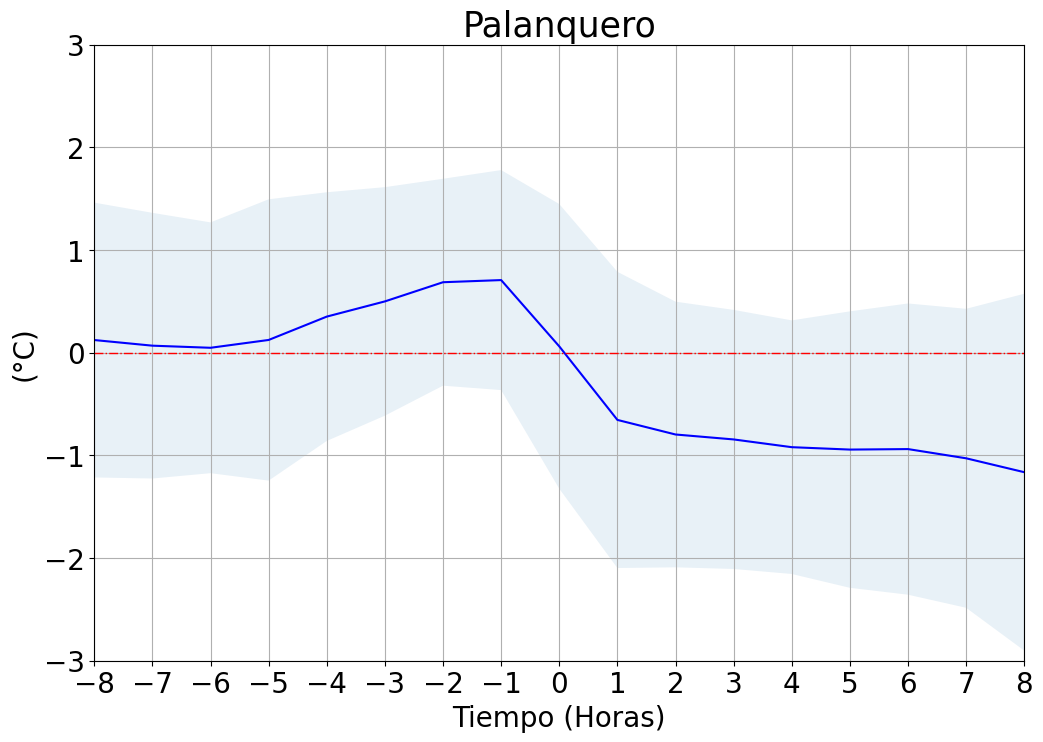

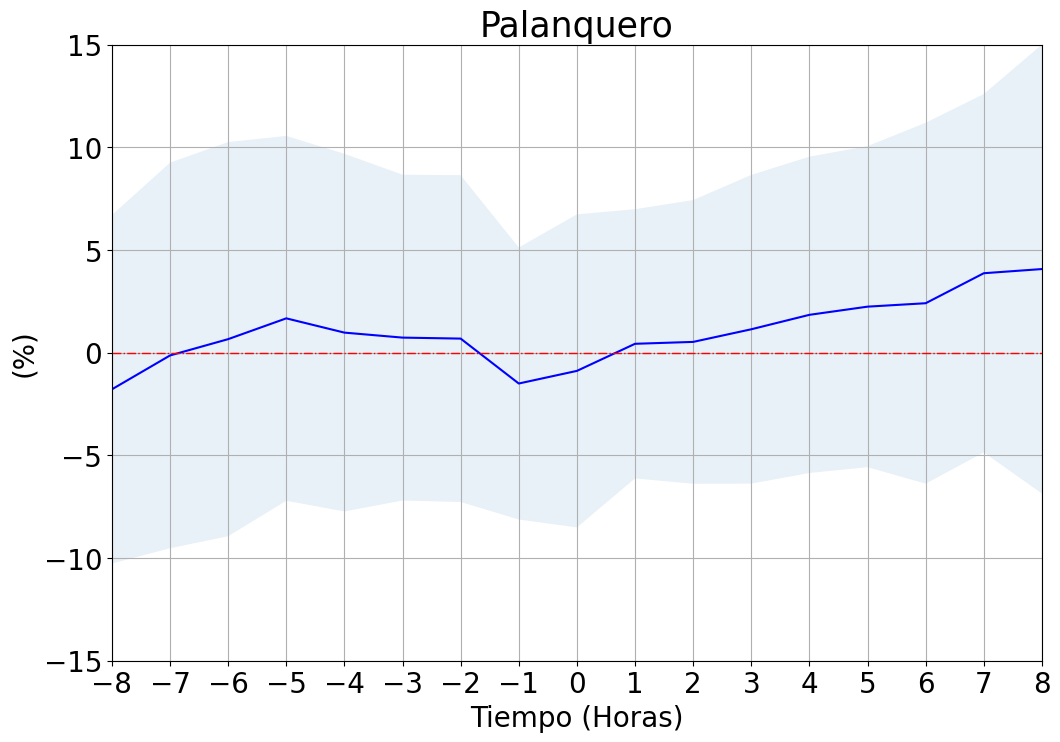

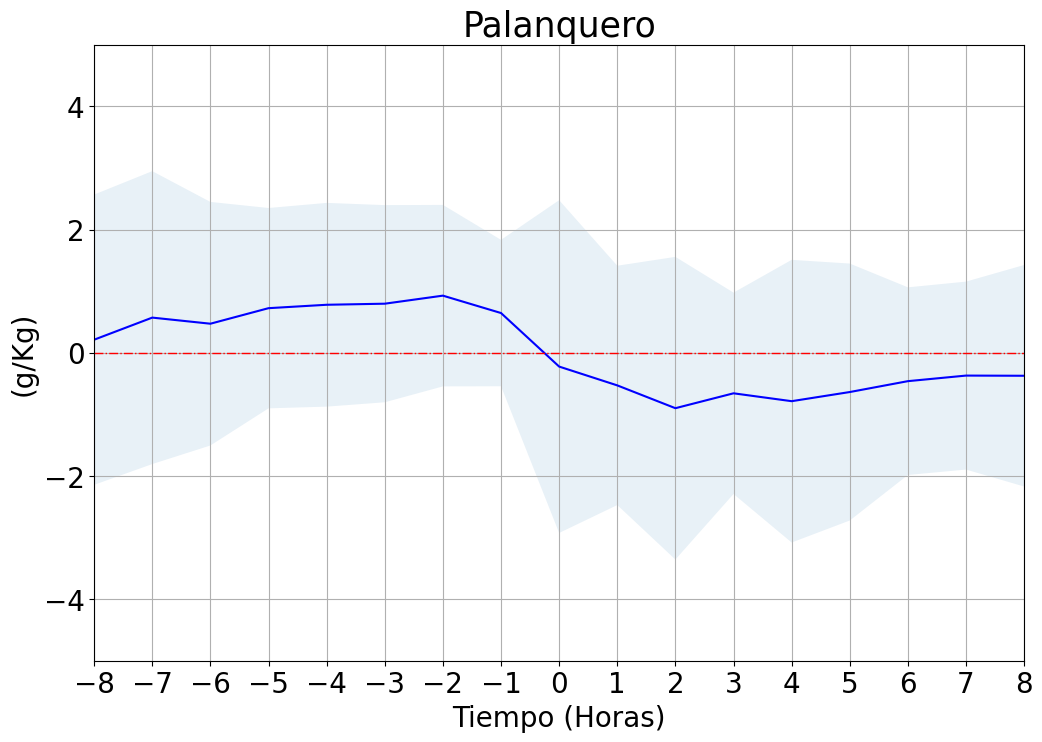

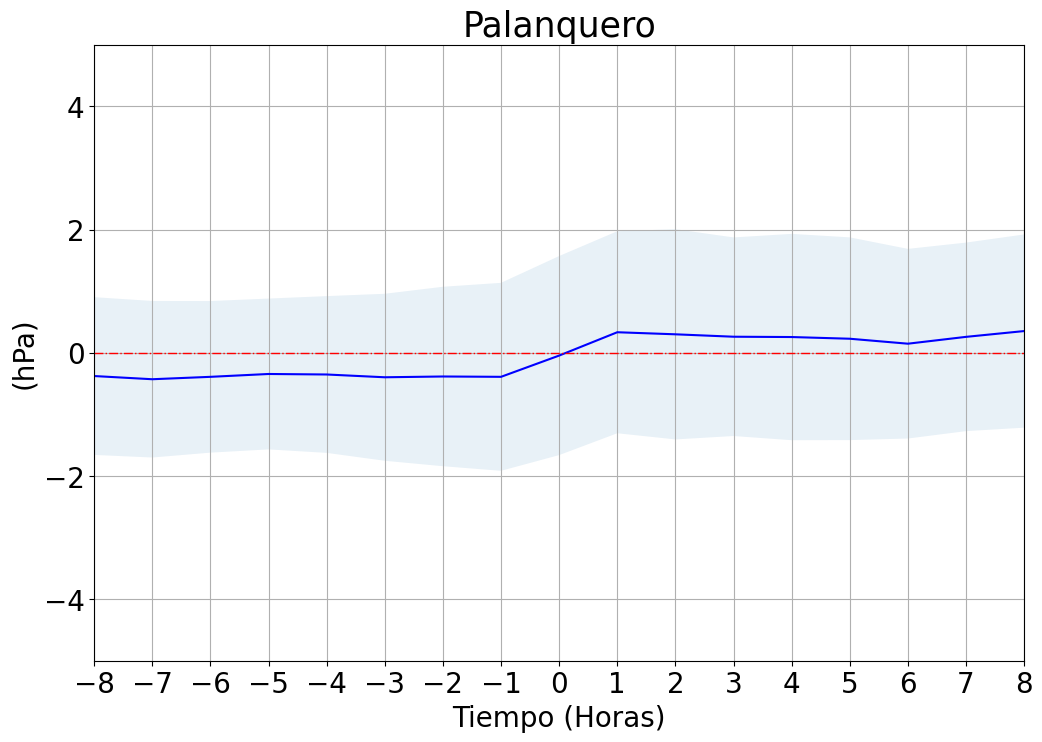

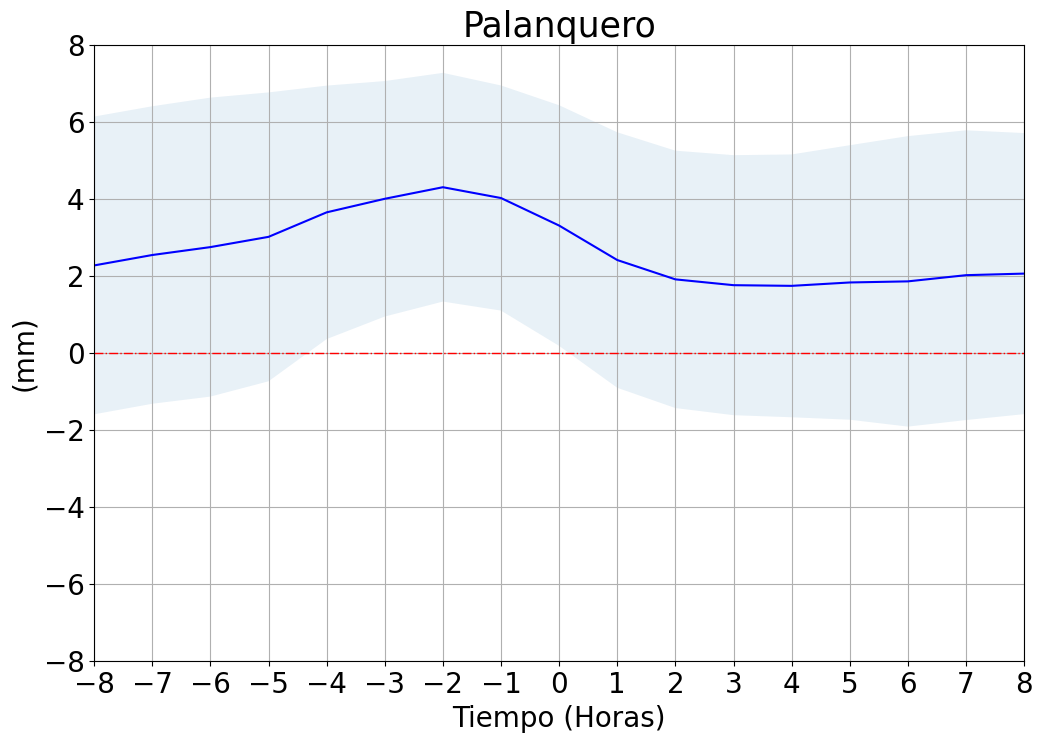

In [20]:
def plot_anomalias(df, anomalia, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'], fontsize= 20)
  plt.plot(df['FECHA_POS'], df[(anomalia, 'mean')], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[(anomalia, 'mean')] + df[(anomalia, 'std')], df[(anomalia, 'mean')] - df[(anomalia, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Tiempo (Horas)", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 25)
  #plt.yticks(np.arange(-10, 10, 1))
  plt.yticks(fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)', 'ylimit': [-3, 3]},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)', 'ylimit': [-15, 15]},
              'HUM_ESPECIFICA_anomalia' : {'title' : 'Anomalias de Humedad Específica', 'name2save' : f'anomalias_humedad_especifica_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(g/Kg)', 'ylimit': [-5, 5]},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)', 'ylimit': [-5, 5]},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_20h_7h_{NOMBRE_ESTACION}_{int_horas}h_nuevo.png', 'ylabel' : '(mm)', 'ylimit': [-8, 8]}
    }

for key in dict_names:
  plot_anomalias(dfAnomalia, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas, dict_names[key]['ylimit'])

# dfAnomalia

# Gráfico de caja y bigotes para anomalias

In [21]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.cbook import _reshape_2D

# Function adapted from matplotlib.cbook
def my_boxplot_stats(X, whis=1.5, bootstrap=None, labels=None,
                  autorange=False, percents=[25, 75]):

    def _bootstrap_median(data, N=5000):
        # determine 95% confidence intervals of the median
        M = len(data)
        percentiles = [2.5, 97.5]

        bs_index = np.random.randint(M, size=(N, M))
        bsData = data[bs_index]
        estimate = np.median(bsData, axis=1, overwrite_input=True)

        CI = np.percentile(estimate, percentiles)
        return CI

    def _compute_conf_interval(data, med, iqr, bootstrap):
        if bootstrap is not None:
            # Do a bootstrap estimate of notch locations.
            # get conf. intervals around median
            CI = _bootstrap_median(data, N=bootstrap)
            notch_min = CI[0]
            notch_max = CI[1]
        else:

            N = len(data)
            notch_min = med - 1.57 * iqr / np.sqrt(N)
            notch_max = med + 1.57 * iqr / np.sqrt(N)

        return notch_min, notch_max

    # output is a list of dicts
    bxpstats = []

    # convert X to a list of lists
    X = _reshape_2D(X, "X")

    ncols = len(X)
    if labels is None:
        labels = itertools.repeat(None)
    elif len(labels) != ncols:
        raise ValueError("Dimensions of labels and X must be compatible")

    input_whis = whis
    for ii, (x, label) in enumerate(zip(X, labels)):

        # empty dict
        stats = {}
        if label is not None:
            stats['label'] = label

        # restore whis to the input values in case it got changed in the loop
        whis = input_whis

        # note tricksyness, append up here and then mutate below
        bxpstats.append(stats)

        # if empty, bail
        if len(x) == 0:
            stats['fliers'] = np.array([])
            stats['mean'] = np.nan
            stats['med'] = np.nan
            stats['q1'] = np.nan
            stats['q3'] = np.nan
            stats['cilo'] = np.nan
            stats['cihi'] = np.nan
            stats['whislo'] = np.nan
            stats['whishi'] = np.nan
            stats['med'] = np.nan
            continue

        # up-convert to an array, just to be safe
        x = np.asarray(x)

        # arithmetic mean
        stats['mean'] = np.mean(x)

        # median
        med = np.percentile(x, 50)
        ## Altered line
        q1, q3 = np.percentile(x, (percents[0], percents[1]))

        # interquartile range
        stats['iqr'] = q3 - q1
        if stats['iqr'] == 0 and autorange:
            whis = 'range'

        # conf. interval around median
        stats['cilo'], stats['cihi'] = _compute_conf_interval(
            x, med, stats['iqr'], bootstrap
        )

        # lowest/highest non-outliers
        if np.isscalar(whis):
            if np.isreal(whis):
                loval = q1 - whis * stats['iqr']
                hival = q3 + whis * stats['iqr']
            elif whis in ['range', 'limit', 'limits', 'min/max']:
                loval = np.min(x)
                hival = np.max(x)
            else:
                raise ValueError('whis must be a float, valid string, or list '
                                 'of percentiles')
        else:
            loval = np.percentile(x, whis[0])
            hival = np.percentile(x, whis[1])

        # get high extreme
        wiskhi = np.compress(x <= hival, x)
        if len(wiskhi) == 0 or np.max(wiskhi) < q3:
            stats['whishi'] = q3
        else:
            stats['whishi'] = np.max(wiskhi)

        # get low extreme
        wisklo = np.compress(x >= loval, x)
        if len(wisklo) == 0 or np.min(wisklo) > q1:
            stats['whislo'] = q1
        else:
            stats['whislo'] = np.min(wisklo)

        # compute a single array of outliers
        stats['fliers'] = np.hstack([
            np.compress(x < stats['whislo'], x),
            np.compress(x > stats['whishi'], x)
        ])

        # add in the remaining stats
        stats['q1'], stats['med'], stats['q3'] = q1, med, q3

    return bxpstats

def plot_caja_bigote(
    df, ## Dataframe usado para calcular las metricas de cuartiles
    columna_x, ## Nombre de la columna para agrupar
    columna_y, ## Nombre de la columna con la variable
    titulo, ## Titulo de la figura
    rotulo_x, ## Nombre que aparece en el rotulo para el eje X
    rotulo_y, ## Nombre que aparece en el rotulo para el eje Y
    nombre_estacion, ## Nombre de la estación
    nombre_figura, ## Nombre usado para guardar la figura
    path_para_salvar, ## Path para salvar la figura
    lista_xtick=[], ## Colocar para substituir los nombres en el eje X
    ylim=[], ## Colocar para cambiar el rango del gráfico en el eje Y
    cero_vertical=False ## Colocar como True si quiere que aparezca la linea vertical para el dato 0
    ):

  stats = {}

  # Compute the boxplot stats (as in the default matplotlib implementation)
  variable_label = df[columna_x].unique()
  variable_label = np.sort(variable_label)
  for var_filter in variable_label:
    df_plot = df[df[columna_y].notnull()]
    df_plot = df_plot[df_plot[columna_x] == var_filter][columna_y].to_numpy()
    stats[var_filter] = my_boxplot_stats(df_plot, percents=[25, 75])[0]
  fig, ax = plt.subplots(1, 1)
  fig.set_size_inches(12,8)
  ax.plot(np.zeros_like(variable_label), color = 'r', linestyle = '-.', linewidth = 1)
  ax.bxp([stats[numb] for numb in stats.keys()], positions=range(len(variable_label)),showfliers=False)
  ax.grid()
  ax.set_xlabel(rotulo_x, fontsize=20)
  ax.set_ylabel(rotulo_y, fontsize=20)
  ax.xaxis.set_tick_params(labelsize=20)
  ax.yaxis.set_tick_params(labelsize=20)
  if ylim:
    ax.set_ylim(ylim)
  ax.set_title(nombre_estacion.capitalize(), fontsize= 20)
  if lista_xtick:
    ax.set_xticks(range(0, len(lista_xtick), 1), labels = lista_xtick, fontsize= 20)
    if cero_vertical:
      ax.axvline(x=int(len(lista_xtick)/2), color = 'r')
  fig.savefig(path_para_salvar + nombre_estacion.capitalize() + "_" + nombre_figura, format='png', bbox_inches = 'tight' )

In [22]:
print(int(-1.5))

-1


In [23]:
label_x_values = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [24]:
dfCross

index              FECHA_EVENTO                 FECHA_MIN  MIN_T  \
0         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
1         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
2         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
3         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
4         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
...     ...                       ...                       ...    ...   
2171    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2172    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2173    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2174    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2175    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

         LON    LAT                      FECHA  FECHA_POS  TEMP   HUM  ...  \
0    -74.836  5.627  2011-01-14 16:00:00-05:00       -8.0  36.1  47.0  ...   
1    -74.836  5.627  2011-01-14 17:00:00-05:00       -7.0  34.5  53.0  ...   
2    -74.836  5.627  2011-01-14 18:00:00-05:00       -6.0   NaN  78.0  ...   
3    -74.836  5.627  2011-01-14 19:00:00-05:00       -5.0  27.2  87.0  ...   
4    -74.836  5.627  2011-01-14 20:00:00-05:00       -4.0  26.3  91.0  ...   
...      ...    ...                        ...        ...   ...   ...  ...   
2171 -74.836  5.484  2017-12-29 04:00:00-05:00        4.0  21.6  98.0  ...   
2172 -74.836  5.484  2017-12-29 05:00:00-05:00        5.0  21.9  98.0  ...   
2173 -74.836  5.484  2017-12-29 06:00:00-05:00        6.0  21.7  98.0  ...   
2174 -74.836  5.484  2017-12-29 07:00:00-05:00        7.0  22.3  98.0  ...   
2175 -74.836  5.484  2017-12-29 08:00:00-05:00        8.0  23.4  95.0  ...   

      TEMP_mean   HUM_mean  PRESION_mean HUM_ESPECIFICA_mean   PWV_mean  \
0     32.781034  62.090068    985.062162           19.428284  52.364498   
1     31.481422  67.961812    985.331253           19.875229  52.832476   
2     28.938304  79.054181    986.149731           20.184835  53.303802   
3     27.201797  85.991962    987.268009           19.984187  54.618103   
4     26.266611  89.772118    988.472887           19.779092  54.990743   
...         ...        ...           ...                 ...        ...   
2171  23.624545  96.599726    989.524463           18.089357  53.935836   
2172  23.476396  96.941017    989.957486           18.015720  53.615639   
2173  23.392489  97.098294    990.549096           17.900100  53.493620   
2174  24.552886  94.934080    991.286165           18.849598  53.355961   
2175  26.403856  87.091133    991.815086           19.431882  53.046632   

      TEMP_anomalia  HUM_anomalia  PRESION_anomalia  HUM_ESPECIFICA_anomalia  \
0          3.318966    -15.090068         -1.762162                -0.933472   
1          3.018578    -14.961812         -2.131253                -0.839439   
2               NaN     -1.054181         -2.149731                      NaN   
3         -0.001797      1.008038         -2.268009                 0.331079   
4          0.033389      1.227882         -2.172887                 0.324235   
...             ...           ...               ...                      ...   
2171      -2.024545      1.400274          0.175537                -1.883737   
2172      -1.576396      1.058983          0.042514                -1.512644   
2173      -1.692489      0.901706         -0.049096                -1.607493   
2174      -2.252886      3.065920          0.213835                -1.961392   
2175      -3.003856      7.908867          0.584914                -1.931405   

      PWV_anomalia  
0        -2.566998  
1        -2.269976  
2        -2.518802  
3        -2.167270  
4        -2.044077  
...            ...  
2171      0.551664  
2172      1.550195  
2173      1.540547  
2174      1.783206  
2175      2.230868  

[2176 rows x 24 columns]

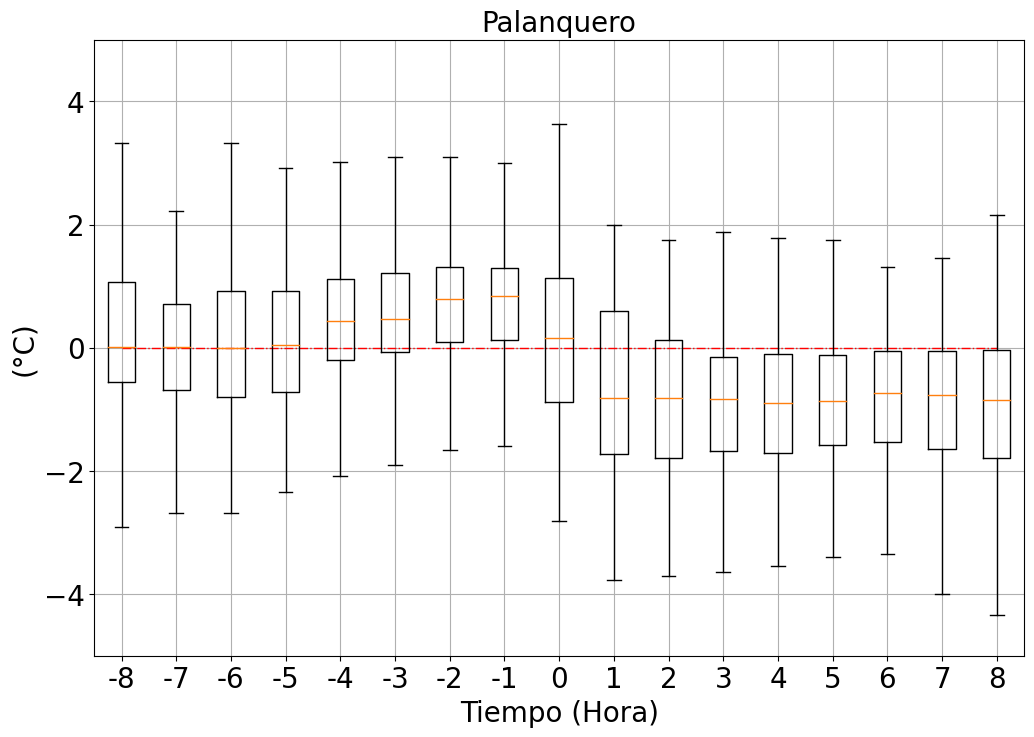

In [25]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="TEMP_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(°C)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_temp_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-5, 5]
)

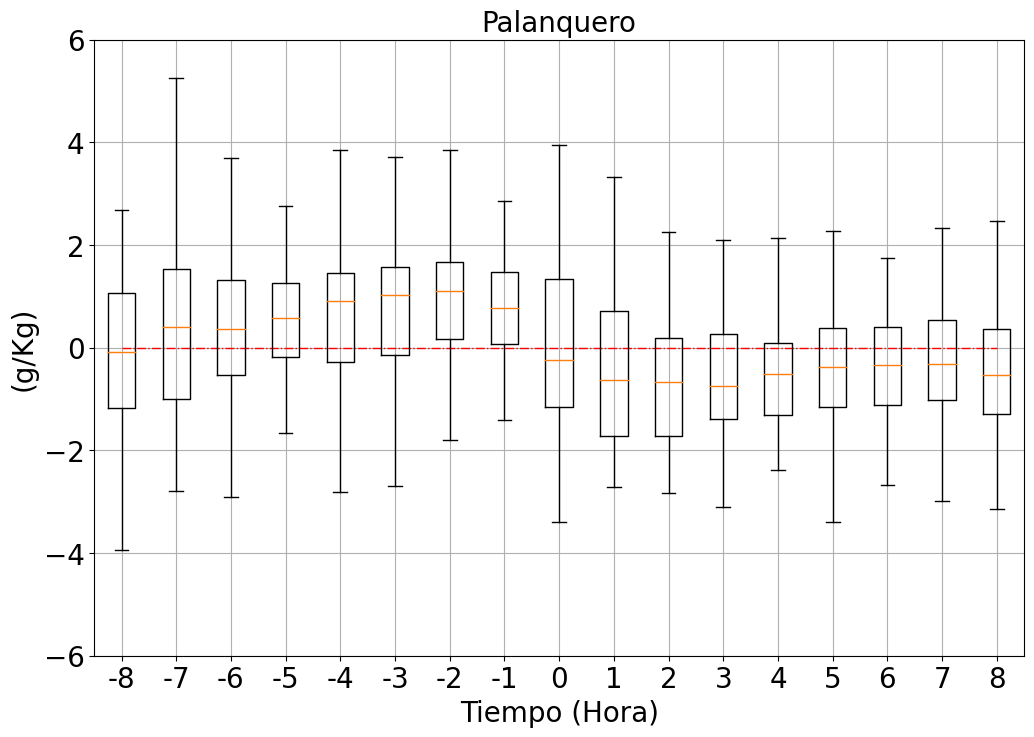

In [26]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="HUM_ESPECIFICA_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(g/Kg)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_hum_especifica_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-6, 6]
)

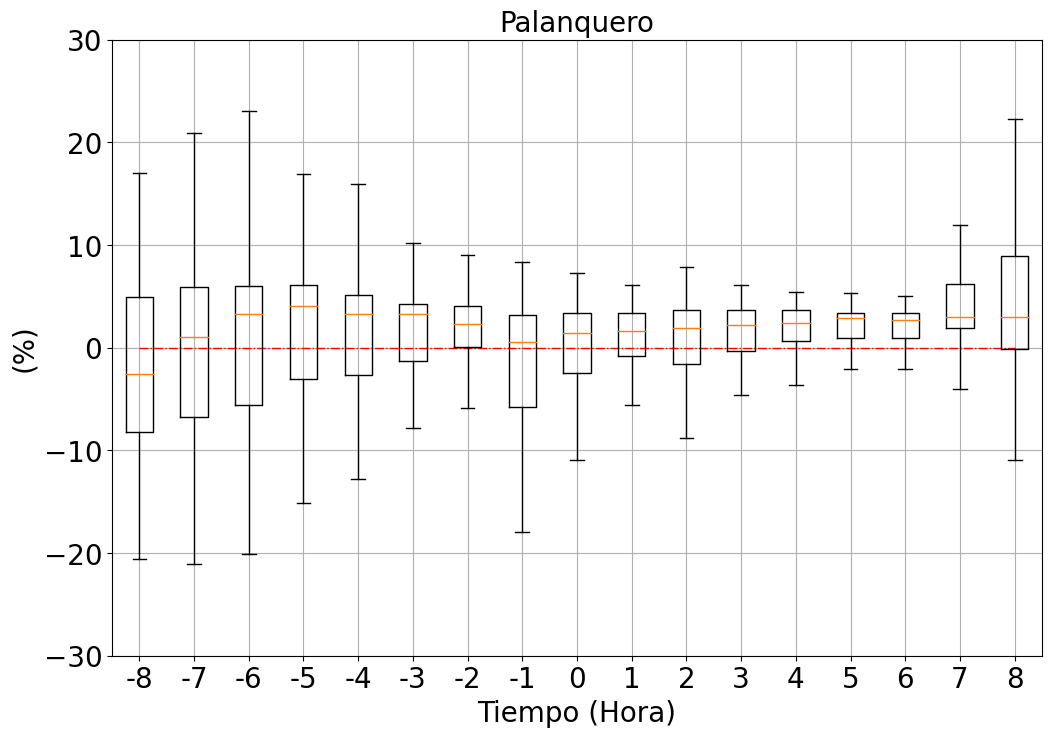

In [27]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="HUM_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(%)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_HUM_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-30, 30]
)

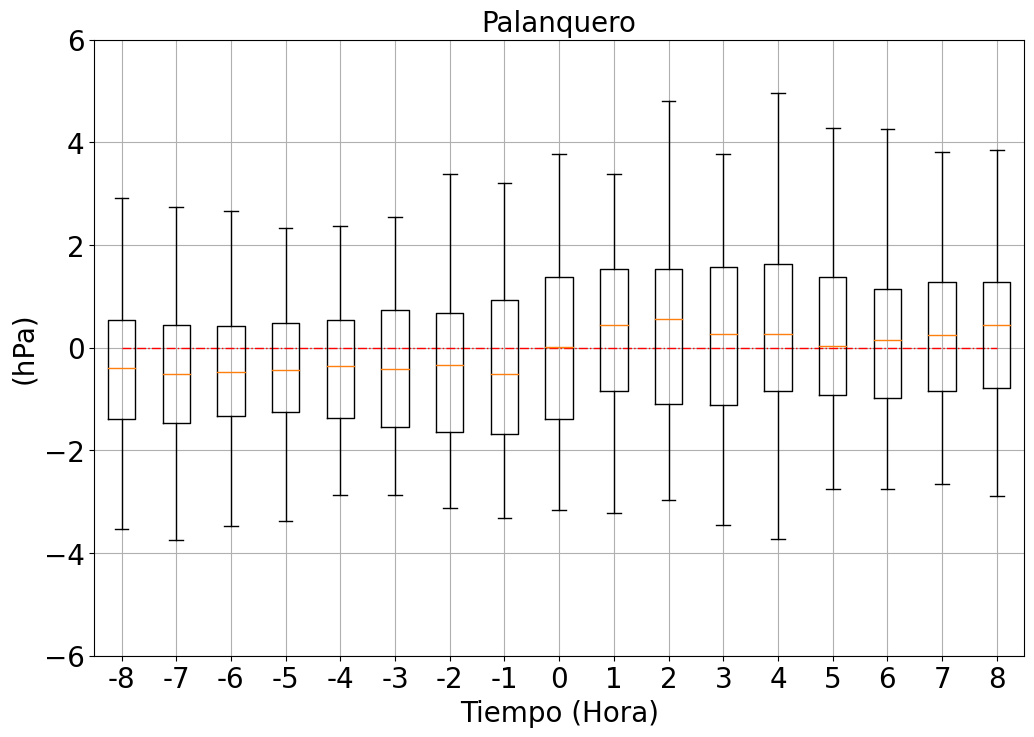

In [28]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="PRESION_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(hPa)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PRESION_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-6, 6]
)

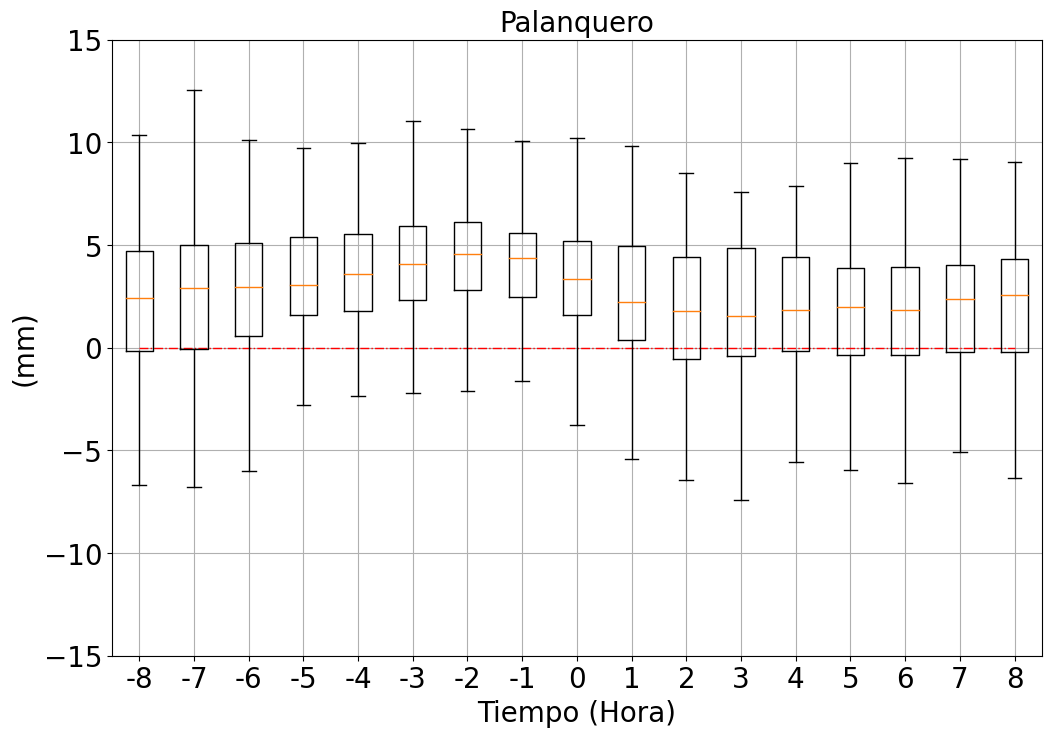

In [29]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="PWV_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(mm)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PWV_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-15, 15]
)

# Análisis con los 21 Eventos que tienen todas las variábles metereológicas completas

In [30]:
# dfEventos0 = dfCross.loc[dfCross['FECHA_POS'] == 0.]
# dfEventos0 = dfEventos0[['FECHA_EVENTO', 'min_t', 'index'] + columns_mean]
# dfEventos0['NUMERO_VARS'] = dfEventos0[columns_mean].notnull().sum(axis=1)
# dfEventos0

In [31]:
# dfEventos0.count()

In [32]:
# dfEventos0['NUMERO_VARS'].value_counts()

In [33]:
# dfVarsCompletas = dfEventos0.loc[dfEventos0['NUMERO_VARS'] == 4]
# indexVarsCompletas = dfVarsCompletas['index']
# dfVarsComp = pd.merge(dfCross, indexVarsCompletas, on = 'index', how = 'inner')

# dfAnomaliaVarsComp = dfVarsComp[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()
# dfAnomaliaVarsComp

In [34]:
# dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)'},
#               'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)'},
#               'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)'},
#               'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(mm)'}
#     }

# for key in dict_names:
#   plot_anomalias(dfAnomaliaVarsComp, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

# Análisis para Dirección del Viento

In [35]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

# df10mean['DIRVIENTO_mean'] = df10mean.apply(func_dir, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
# df10mean['VELVIENTO_mean'] = df10mean.apply(func_vel, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10m['DIRVIENTO'] = df10m.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
df10m['VELVIENTO'] = df10m.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

In [36]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA  \
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00   
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00   
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00   
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00   
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00   
...              ...       ...       ...  ...                        ...   
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00   
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00   
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00   
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00   
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00   

        DIRVIENTO  VELVIENTO  
0      188.154988   0.145757  
1      185.165060   0.114737  
2      181.873571   0.133225  
3      184.778293   0.165550  
4      181.000000   0.116667  
...           ...        ...  
41343  159.015918   1.752832  
41344  278.302416   0.113421  
41345  345.914990   0.419829  
41346  132.790163   0.264428  
41347  164.048620   0.212713  

[41348 rows x 7 columns]

# Cargando Eventos e encontrando intervalo m minutos antes y después

## Para 10 minutos

In [37]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, 10) if minute > 0 else range(minute, 0, 10))]

dfEventAnMin = dfEventos.copy()

dfEventAnMin['FECHA_ANTES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAnMin['FECHA_DESPUES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAnMin['FECHA_INTERVALO'] = dfEventAnMin['FECHA_ANTES_MIN'] + dfEventAnMin['FECHA_DESPUES_MIN']
dfEventAnMin = dfEventAnMin.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAnMin['FECHA_POS'] = (dfEventAnMin['FECHA_INTERVALO'] - dfEventAnMin['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAnMin = dfEventAnMin.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAnMin['FECHA'] = dfEventAnMin['FECHA'].astype(str)

dfEventAnMin.head(10)

FECHA_HORA              FECHA_EVENTO  MIN_T     LON    LAT  \
0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
1 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
2 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
3 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
4 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
5 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
6 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
7 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
8 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
9 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   

                       FECHA  FECHA_POS  
0  2011-01-14 16:20:00-05:00     -480.0  
1  2011-01-14 16:30:00-05:00     -470.0  
2  2011-01-14 16:40:00-05:00     -460.0  
3  2011-01-14 16:50:00-05:00     -450.0  
4  2011-01-14 17:00:00-05:00     -440.0  
5  2011-01-14 17:10:00-05:00     -430.0  
6  2011-01-14 17:20:00-05:00     -420.0  
7  2011-01-14 17:30:00-05:00     -410.0  
8  2011-01-14 17:40:00-05:00     -400.0  
9  2011-01-14 17:50:00-05:00     -390.0

In [38]:
dfCrossPrec = pd.merge(dfEventAnMin, dfPrec, on='FECHA', how = 'left')

dfCrossPrecGroup = dfCrossPrec.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})
dfCrossPrecGroup = dfCrossPrecGroup.rename(columns = {("PREC", "mean") : "PREC_mean", ("PREC", "std") : "PREC_std"}).reset_index()

dfCrossPrecGroup

FECHA_POS      PREC          
                  mean       std
0     -480.0  0.001010  0.010050
1     -470.0  0.003093  0.017402
2     -460.0  0.001031  0.010153
3     -450.0  0.002083  0.014358
4     -440.0  0.001042  0.010206
..       ...       ...       ...
92     440.0  0.047368  0.183258
93     450.0  0.046465  0.163078
94     460.0  0.057292  0.375778
95     470.0  0.098969  0.593979
96     480.0  0.037113  0.146714

[97 rows x 3 columns]

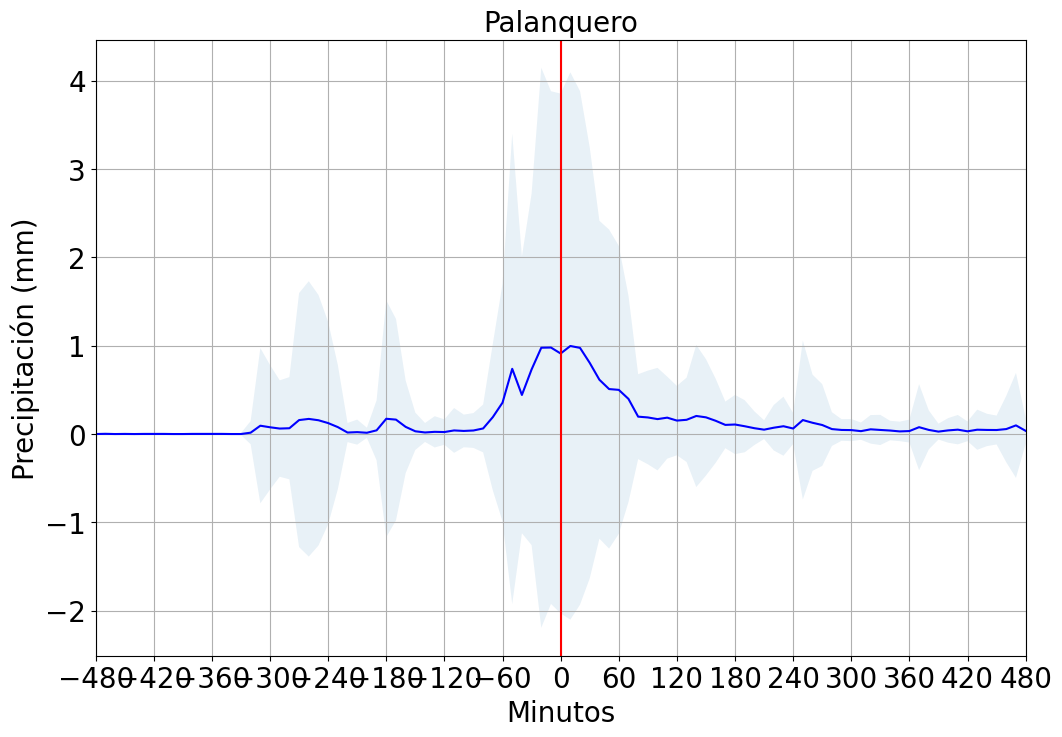

In [39]:
def plot_10m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  # plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PREC' : {'title' : 'Análisis de Precipitación de eventos convectivos', 'name2save' : f'analisis_prec_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Precipitación (mm)'},

    }

for key in dict_names.keys():
  plot_10m_interval(dfCrossPrecGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)


In [40]:
dfCrossPrec

FECHA_HORA              FECHA_EVENTO  MIN_T     LON  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
12411 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12412 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12413 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12414 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12415 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

         LAT                      FECHA  FECHA_POS  PREC  
0      5.627  2011-01-14 16:20:00-05:00     -480.0   0.0  
1      5.627  2011-01-14 16:30:00-05:00     -470.0   0.0  
2      5.627  2011-01-14 16:40:00-05:00     -460.0   0.0  
3      5.627  2011-01-14 16:50:00-05:00     -450.0   0.0  
4      5.627  2011-01-14 17:00:00-05:00     -440.0   0.0  
...      ...                        ...        ...   ...  
12411  5.484  2017-12-29 07:00:00-05:00      440.0   0.0  
12412  5.484  2017-12-29 07:10:00-05:00      450.0   0.0  
12413  5.484  2017-12-29 07:20:00-05:00      460.0   0.0  
12414  5.484  2017-12-29 07:30:00-05:00      470.0   0.0  
12415  5.484  2017-12-29 07:40:00-05:00      480.0   0.0  

[12416 rows x 8 columns]

In [41]:
label_x_values_prec = [str(x) if x%120 == 0 else "" for x in list(range(-360, 361, 10))]

In [42]:
dfCrossPrec

FECHA_HORA              FECHA_EVENTO  MIN_T     LON  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
12411 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12412 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12413 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12414 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12415 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

         LAT                      FECHA  FECHA_POS  PREC  
0      5.627  2011-01-14 16:20:00-05:00     -480.0   0.0  
1      5.627  2011-01-14 16:30:00-05:00     -470.0   0.0  
2      5.627  2011-01-14 16:40:00-05:00     -460.0   0.0  
3      5.627  2011-01-14 16:50:00-05:00     -450.0   0.0  
4      5.627  2011-01-14 17:00:00-05:00     -440.0   0.0  
...      ...                        ...        ...   ...  
12411  5.484  2017-12-29 07:00:00-05:00      440.0   0.0  
12412  5.484  2017-12-29 07:10:00-05:00      450.0   0.0  
12413  5.484  2017-12-29 07:20:00-05:00      460.0   0.0  
12414  5.484  2017-12-29 07:30:00-05:00      470.0   0.0  
12415  5.484  2017-12-29 07:40:00-05:00      480.0   0.0  

[12416 rows x 8 columns]

In [43]:
dfCrossPrec_plot = dfCrossPrec.copy()
dfCrossPrec_plot = dfCrossPrec_plot[abs(dfCrossPrec_plot['FECHA_POS'])<= 360]
dfCrossPrec_plot

FECHA_HORA              FECHA_EVENTO  MIN_T     LON  \
12    2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
13    2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
14    2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
15    2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
16    2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
12399 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12400 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12401 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12402 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12403 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

         LAT                      FECHA  FECHA_POS  PREC  
12     5.627  2011-01-14 18:20:00-05:00     -360.0   0.0  
13     5.627  2011-01-14 18:30:00-05:00     -350.0   0.0  
14     5.627  2011-01-14 18:40:00-05:00     -340.0   0.0  
15     5.627  2011-01-14 18:50:00-05:00     -330.0   0.0  
16     5.627  2011-01-14 19:00:00-05:00     -320.0   0.0  
...      ...                        ...        ...   ...  
12399  5.484  2017-12-29 05:00:00-05:00      320.0   0.0  
12400  5.484  2017-12-29 05:10:00-05:00      330.0   0.0  
12401  5.484  2017-12-29 05:20:00-05:00      340.0   0.0  
12402  5.484  2017-12-29 05:30:00-05:00      350.0   0.0  
12403  5.484  2017-12-29 05:40:00-05:00      360.0   0.0  

[9344 rows x 8 columns]

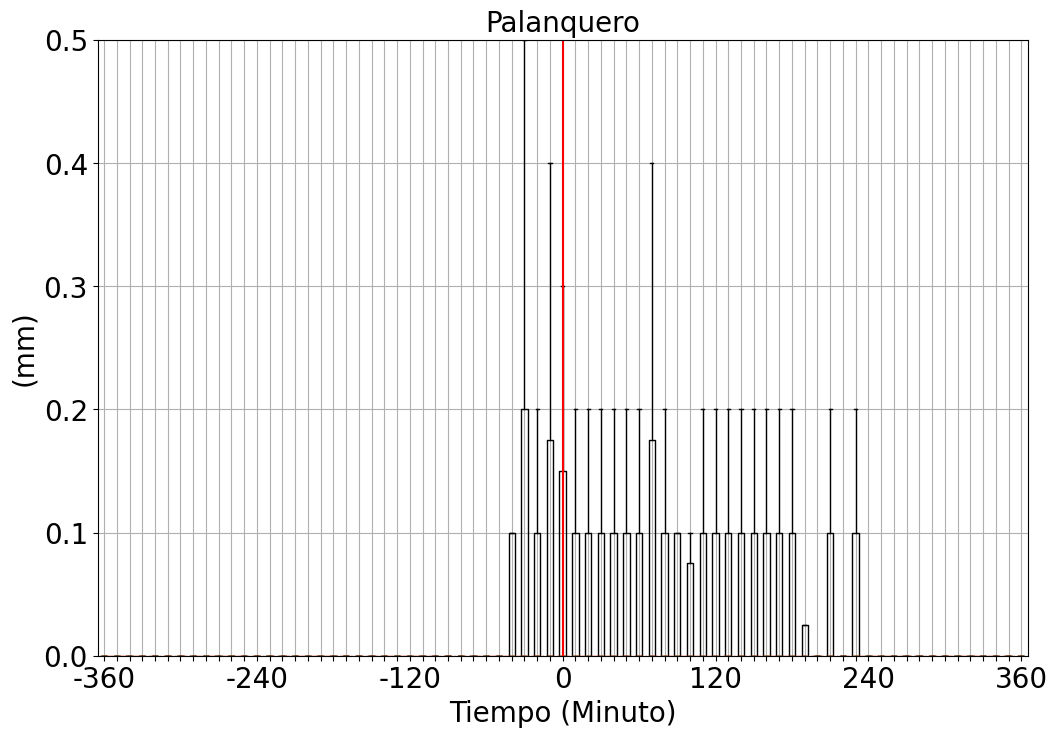

In [44]:
plot_caja_bigote(
    df=dfCrossPrec_plot,
    columna_x="FECHA_POS",
    columna_y="PREC",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Minuto)",
    rotulo_y="(mm)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PREC_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values_prec,
    ylim=[0, 0.5],
    cero_vertical=True
)

## Para 5 minutos

In [45]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, intervalo_minutes_samples_5m) if minute > 0 else range(minute, 0, intervalo_minutes_samples_5m))]

dfEventAn5Min = dfEventos.copy()

dfEventAn5Min['FECHA_ANTES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAn5Min['FECHA_DESPUES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAn5Min['FECHA_INTERVALO'] = dfEventAn5Min['FECHA_ANTES_MIN'] + dfEventAn5Min['FECHA_DESPUES_MIN']
dfEventAn5Min = dfEventAn5Min.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAn5Min['FECHA_POS'] = (dfEventAn5Min['FECHA_INTERVALO'] - dfEventAn5Min['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAn5Min = dfEventAn5Min.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAn5Min['FECHA'] = dfEventAn5Min['FECHA'].astype(str)

dfEventAn5Min.head(10)

FECHA_HORA              FECHA_EVENTO  MIN_T     LON    LAT  \
0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
1 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
2 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
3 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
4 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
5 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
6 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
7 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
8 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   
9 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836  5.627   

                       FECHA  FECHA_POS  
0  2011-01-14 16:20:00-05:00     -480.0  
1  2011-01-14 16:25:00-05:00     -475.0  
2  2011-01-14 16:30:00-05:00     -470.0  
3  2011-01-14 16:35:00-05:00     -465.0  
4  2011-01-14 16:40:00-05:00     -460.0  
5  2011-01-14 16:45:00-05:00     -455.0  
6  2011-01-14 16:50:00-05:00     -450.0  
7  2011-01-14 16:55:00-05:00     -445.0  
8  2011-01-14 17:00:00-05:00     -440.0  
9  2011-01-14 17:05:00-05:00     -435.0

In [46]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean']

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [47]:
### Calculando Dataframe con la media de todos los datos de PWV

dfPWV_5m['HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[11:16])
dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean_PWV_5m.columns if col != 'HORA']
for col in columns_mean:
  dfmean_PWV_5m = dfmean_PWV_5m.rename(columns={col : f'{col}_mean'})

### Cruzamos los datos con los horarios de los eventos y lo separamos

dfCrossPWV_5m = pd.merge(dfEventAn5Min, dfPWV_5m, on='FECHA', how = 'left')
dfCrossPWV_5m['HORA'] = dfCrossPWV_5m['FECHA'].apply(lambda x: x[11:16])

### Cruzamos con los datos de la media
dfCrossPWV_5m = pd.merge(dfCrossPWV_5m, dfmean_PWV_5m, on = 'HORA', how='left')

### Calculamos la anomalia haciendo (dato - media)
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  dfCrossPWV_5m[anomalia] = dfCrossPWV_5m[f'{col}'] - dfCrossPWV_5m[f'{col}_mean']

### Calculo de las medias de los eventos
dfCrossPWV_5mGroup = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV" : ["mean", "std"]})
dfCrossPWV_5mGroup = dfCrossPWV_5mGroup.rename(columns = {("PWV", "mean") : "PWV_mean", ("PWV", "std") : "PWV_std"}).reset_index()

### Agrupamiento para anomalias
dfCrossPWV_5mGroup_anom = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV_anomalia" : ["mean", "std"]})
dfCrossPWV_5mGroup_anom = dfCrossPWV_5mGroup_anom.rename(columns = {("PWV_anomalia", "mean") : "PWV_anomalia_mean", ("PWV_anomalia", "std") : "PWV_anomalia_std"}).reset_index()


# dfCrossPWV_5mGroup

<ipython-input-47-6ca9a8f5fa07>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)


## Gráfica de PWV 5 minutos

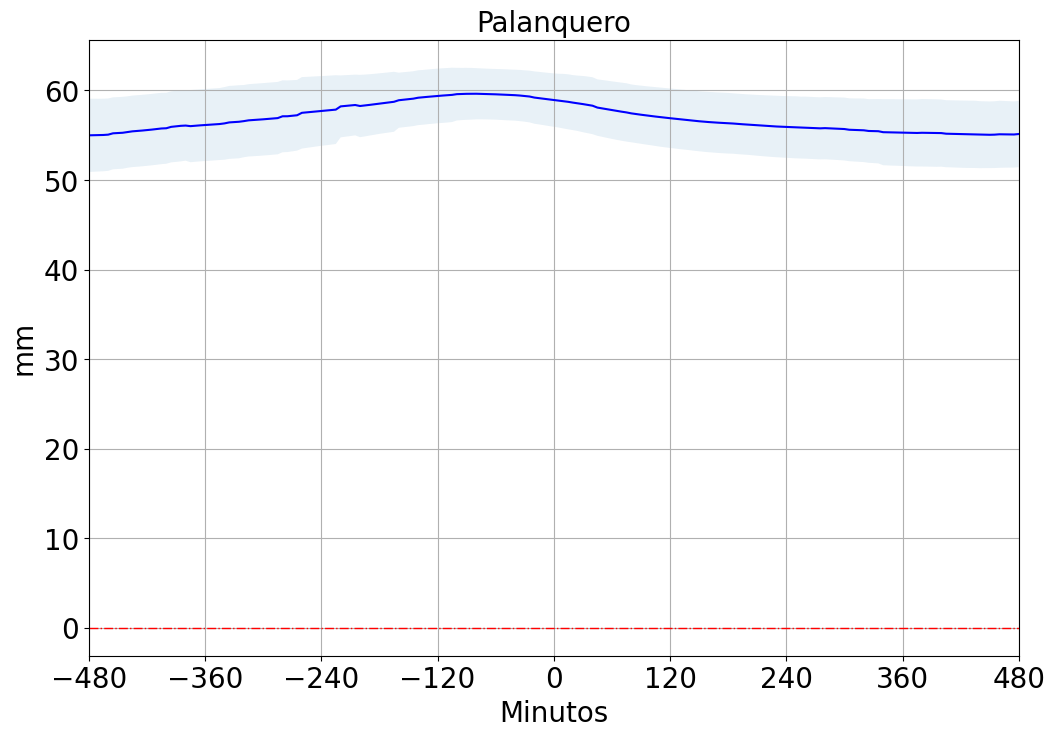

In [48]:
def plot_5m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 24
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  #plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PWV' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

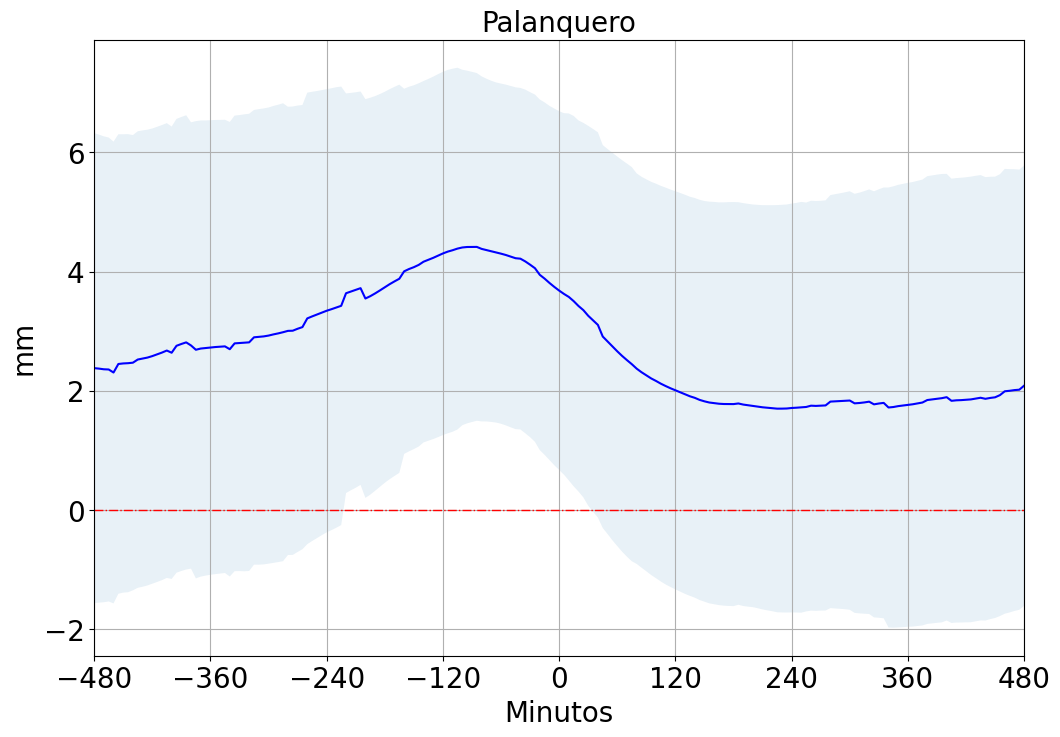

In [49]:
dict_names = {'PWV_anomalia' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_anomalia_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup_anom, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

## Análisis de percentiles - Precipitación

In [50]:
def plot_percentil_interval_prec(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency],fontsize=15)
  plt.yticks(fontsize=20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  #plt.plot(df['FECHA_POS'], df[.5], label = f"Percentil")
  ## Gráfica del promedio
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], linestyle = '--')

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)

  plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  plt.ylim(0,2.2)
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos",fontsize=15)
  plt.ylabel(ylabel_name,fontsize=20)
  plt.title("Palanquero",fontsize=20)
  plt.legend(fontsize=20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [51]:
dfCrossPrec

FECHA_HORA              FECHA_EVENTO  MIN_T     LON  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
12411 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12412 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12413 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12414 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12415 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

         LAT                      FECHA  FECHA_POS  PREC  
0      5.627  2011-01-14 16:20:00-05:00     -480.0   0.0  
1      5.627  2011-01-14 16:30:00-05:00     -470.0   0.0  
2      5.627  2011-01-14 16:40:00-05:00     -460.0   0.0  
3      5.627  2011-01-14 16:50:00-05:00     -450.0   0.0  
4      5.627  2011-01-14 17:00:00-05:00     -440.0   0.0  
...      ...                        ...        ...   ...  
12411  5.484  2017-12-29 07:00:00-05:00      440.0   0.0  
12412  5.484  2017-12-29 07:10:00-05:00      450.0   0.0  
12413  5.484  2017-12-29 07:20:00-05:00      460.0   0.0  
12414  5.484  2017-12-29 07:30:00-05:00      470.0   0.0  
12415  5.484  2017-12-29 07:40:00-05:00      480.0   0.0  

[12416 rows x 8 columns]

<ipython-input-78-1bc394c9a7f2>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")


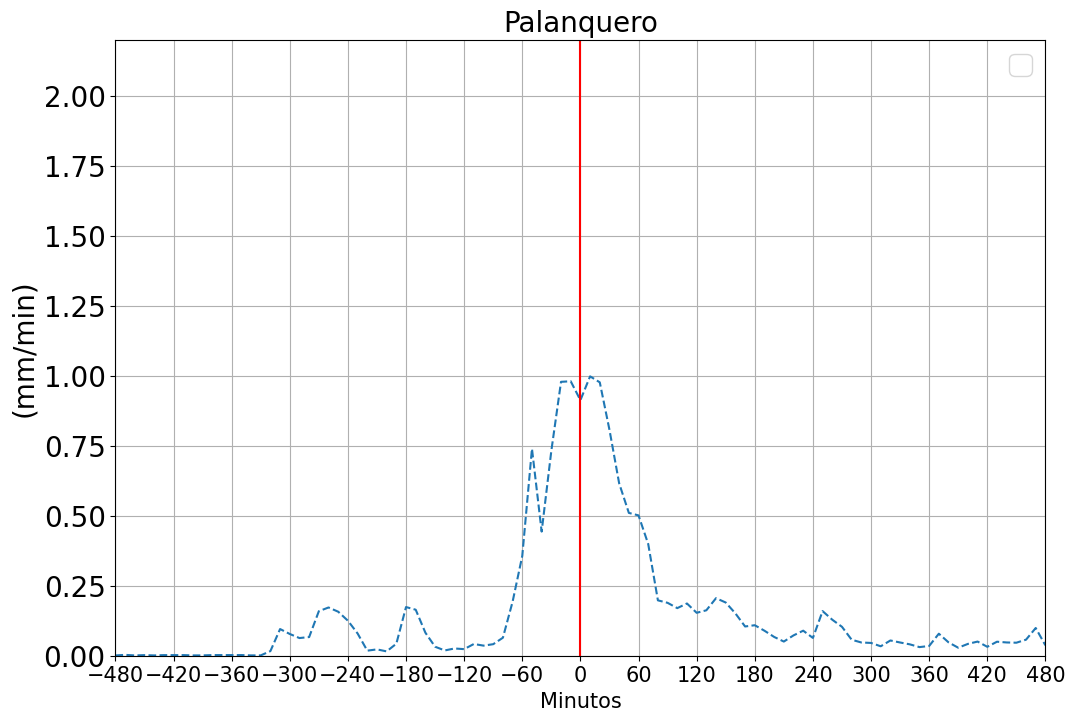

In [78]:
list_percentil = [ 0.05, .1, .20, .25, .50, .75, .80, .90, 0.95]
dfCrossPrecNotNan = dfCrossPrec.dropna().reset_index()
dfPercentilPrec= dfCrossPrecNotNan.groupby("FECHA_POS")['PREC'].quantile(list_percentil).reset_index()
dfAggPrec = dfCrossPrecNotNan.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})

dfPercentilPrec = dfPercentilPrec.pivot(index='FECHA_POS', columns='level_1')['PREC'].reset_index()
dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")

dict_names = {'title' : 'Análisis de precipitación',
              'name2save' : f'analisis_precipitacion_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png',
              'ylabel' : '(mm/min)'
              }

plot_percentil_interval_prec(dfPercentilPrec, [.50, .50], 'PREC', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes)

In [53]:
dfPercentilPrec

FECHA_POS  0.05  0.1  0.2  0.25  0.5  0.75  0.8  0.9   0.95  (PREC, mean)  \
0        -480   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.000      0.001010   
1        -470   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.000      0.003093   
2        -460   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.000      0.001031   
3        -450   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.000      0.002083   
4        -440   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.000      0.001042   
..        ...   ...  ...  ...   ...  ...   ...  ...  ...    ...           ...   
92        440   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.1  0.230      0.047368   
93        450   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.1  0.300      0.046465   
94        460   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.125      0.057292   
95        470   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.1  0.160      0.098969   
96        480   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.1  0.140      0.037113   

    (PREC, std)  CERO  
0      0.010050     0  
1      0.017402     0  
2      0.010153     0  
3      0.014358     0  
4      0.010206     0  
..          ...   ...  
92     0.183258     0  
93     0.163078     0  
94     0.375778     0  
95     0.593979     0  
96     0.146714     0  

[97 rows x 13 columns]

In [54]:
dfCrossPrecNotNan[dfCrossPrecNotNan['FECHA_POS'] == 0]

index                FECHA_HORA              FECHA_EVENTO  MIN_T  \
48       48 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
143     145 2011-02-03 23:00:00-05:00 2011-02-03 23:20:00-05:00  195.6   
240     242 2011-04-04 23:00:00-05:00 2011-04-04 22:40:00-05:00  193.8   
337     339 2011-04-09 23:00:00-05:00 2011-04-09 22:40:00-05:00  197.0   
434     436 2011-04-24 03:00:00-05:00 2011-04-24 02:40:00-05:00  200.5   
...     ...                       ...                       ...    ...   
8159  11979 2017-10-24 03:00:00-05:00 2017-10-24 03:20:00-05:00  196.6   
8256  12076 2017-11-10 23:00:00-05:00 2017-11-10 23:20:00-05:00  208.2   
8353  12173 2017-11-11 00:00:00-05:00 2017-11-10 23:40:00-05:00  202.6   
8450  12270 2017-12-09 21:00:00-05:00 2017-12-09 20:40:00-05:00  208.9   
8547  12367 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

         LON    LAT                      FECHA  FECHA_POS  PREC  
48   -74.836  5.627  2011-01-15 00:20:00-05:00        0.0   0.0  
143  -74.836  5.627  2011-02-03 23:20:00-05:00        0.0   1.9  
240  -74.693  5.627  2011-04-04 22:40:00-05:00        0.0   1.6  
337  -74.693  5.627  2011-04-09 22:40:00-05:00        0.0   4.1  
434  -74.836  5.627  2011-04-24 02:40:00-05:00        0.0   0.1  
...      ...    ...                        ...        ...   ...  
8159 -74.693  5.627  2017-10-24 03:20:00-05:00        0.0   0.0  
8256 -74.693  5.484  2017-11-10 23:20:00-05:00        0.0   0.0  
8353 -74.836  5.341  2017-11-10 23:40:00-05:00        0.0   0.0  
8450 -74.693  5.484  2017-12-09 20:40:00-05:00        0.0   0.0  
8547 -74.836  5.484  2017-12-28 23:40:00-05:00        0.0   0.0  

[87 rows x 9 columns]

# Análisis de Viento

In [55]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

In [56]:
dfEventAnMin['HORA_MINUTO'] = dfEventAnMin['FECHA'].apply(lambda x: x[11:16])
dfEventAnMin

FECHA_HORA              FECHA_EVENTO  MIN_T     LON  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
12411 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12412 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12413 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12414 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
12415 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

         LAT                      FECHA  FECHA_POS HORA_MINUTO  
0      5.627  2011-01-14 16:20:00-05:00     -480.0       16:20  
1      5.627  2011-01-14 16:30:00-05:00     -470.0       16:30  
2      5.627  2011-01-14 16:40:00-05:00     -460.0       16:40  
3      5.627  2011-01-14 16:50:00-05:00     -450.0       16:50  
4      5.627  2011-01-14 17:00:00-05:00     -440.0       17:00  
...      ...                        ...        ...         ...  
12411  5.484  2017-12-29 07:00:00-05:00      440.0       07:00  
12412  5.484  2017-12-29 07:10:00-05:00      450.0       07:10  
12413  5.484  2017-12-29 07:20:00-05:00      460.0       07:20  
12414  5.484  2017-12-29 07:30:00-05:00      470.0       07:30  
12415  5.484  2017-12-29 07:40:00-05:00      480.0       07:40  

[12416 rows x 8 columns]

In [57]:
dfViento['HORA_MINUTO'] = dfViento['FECHA'].apply(lambda x: x[11:16])
dfViento

dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)
dfVientoMean = dfVientoMean.rename(columns={"VELVIENTO":"VELVIENTO_mean"})

<ipython-input-57-23248fbf0cea>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)


In [58]:
dfCrossVientos = pd.merge(dfEventAnMin[['HORA_MINUTO', 'FECHA_POS', 'FECHA']], dfViento[[col for col in dfViento.columns if col != "HORA_MINUTO" ]], on='FECHA', how = 'left')
dfCrossVientos = pd.merge(dfCrossVientos, dfVientoMean[['HORA_MINUTO', 'VELVIENTO_mean']], on='HORA_MINUTO', how = 'left')

### Cálculo de la anomalia
dfCrossVientos['VEL_VIENTO_anomalia'] = dfCrossVientos['VELVIENTO'] - dfCrossVientos['VELVIENTO_mean']

dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : "mean", "VEL_VIENTO_anomalia" : "std"}).reset_index()
# dfCrossVientosGroup
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()

dfCrossVientosGroup2 = pd.DataFrame()
dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "std") ]
dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "mean") ]

In [59]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
12411       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
12412       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
12413       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
12414       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
12415       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
12411        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
12412        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
12413        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
12414        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
12415        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
12411             0.660764  
12412             0.141434  
12413             0.421084  
12414             0.202349  
12415             0.579398  

[12416 rows x 10 columns]

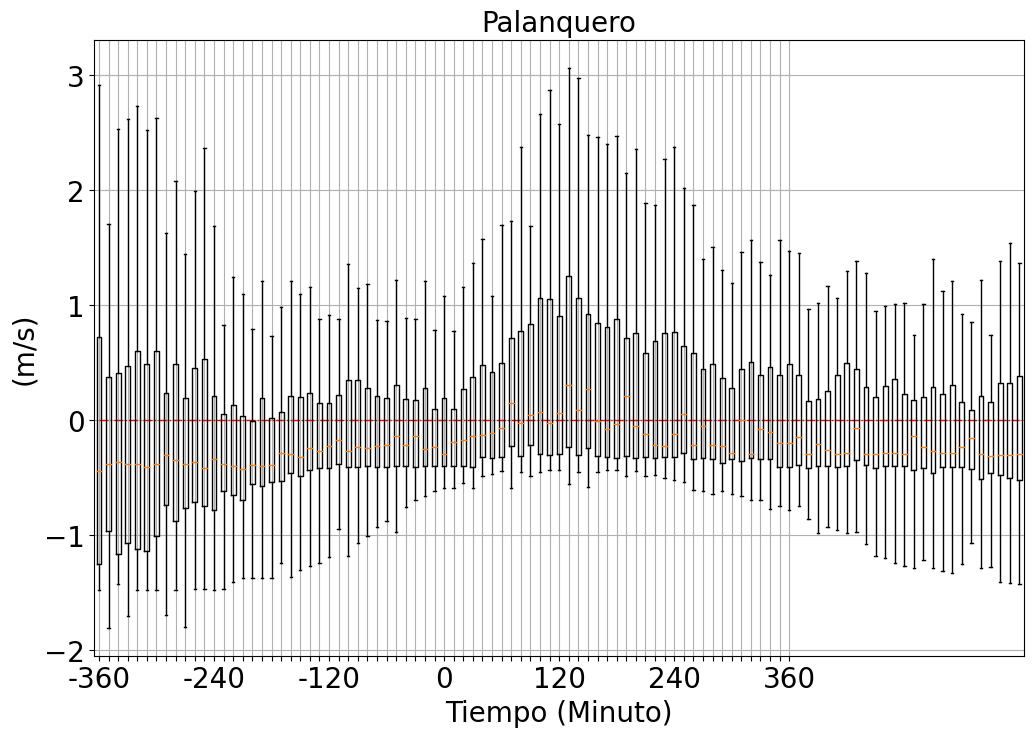

In [60]:
plot_caja_bigote(
    df=dfCrossVientos,
    columna_x="FECHA_POS",
    columna_y="VEL_VIENTO_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Minuto)",
    rotulo_y="(m/s)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PREC_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values_prec,
    #plt.xlim=[-480,480]
    #ylim=[-8, 8]
)

# Revisando cuantos datos tenemos en el tiempo=0

In [61]:
cols_vientos = ["VELVIENTO", "DIRECVIENTO"]

dfEventos0Vientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 0.].copy()
dfEventos0Vientos['NUMERO_VARS'] = dfEventos0Vientos[cols_vientos].notnull().sum(axis=1)
dfEventos0Vientos.count()

HORA_MINUTO            128
FECHA_POS              128
FECHA                  128
DIRECVIENTO             76
VELVIENTO               76
FECHA_HORA              76
X_VIENTO                76
Y_VIENTO                76
VELVIENTO_mean         128
VEL_VIENTO_anomalia     76
NUMERO_VARS            128
dtype: int64

In [62]:
cols_prec = ["PREC"]

dfEventos0Prec = dfCrossPrec.loc[dfCrossPrec['FECHA_POS'] == 0.].copy()
dfEventos0Prec['NUMERO_VARS'] = dfEventos0Prec[cols_prec].notnull().sum(axis=1)
dfEventos0Prec.count()


FECHA_HORA      128
FECHA_EVENTO    128
MIN_T           128
LON             128
LAT             128
FECHA           128
FECHA_POS       128
PREC             87
NUMERO_VARS     128
dtype: int64

In [63]:
# dfCrossVientos = pd.merge(dfEventAnMin, dfViento, on='FECHA', how = 'left')
# dfCrossVientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 240]
# dfCrossVientos["X_VIENTO_STD"] = dfCrossVientos["X_VIENTO"]
# dfCrossVientos["Y_VIENTO_STD"] = dfCrossVientos["Y_VIENTO"]


# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})
# dfCrossVientosGroup2 = pd.DataFrame()
# dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
# dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VELVIENTO", "std") ]
# dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VELVIENTO", "mean") ]

# dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})

# dfCrossVientosGroup['DIR_VIENTO'] = dfCrossVientosGroup.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['DIR_VIENTO'] = (dfCrossVientosGroup['DIR_VIENTO'] + 180.0) % 360
# dfCrossVientosGroup['VEL_VIENTO'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_MEAN'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_STD'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO_STD', y='Y_VIENTO_STD', axis=1)

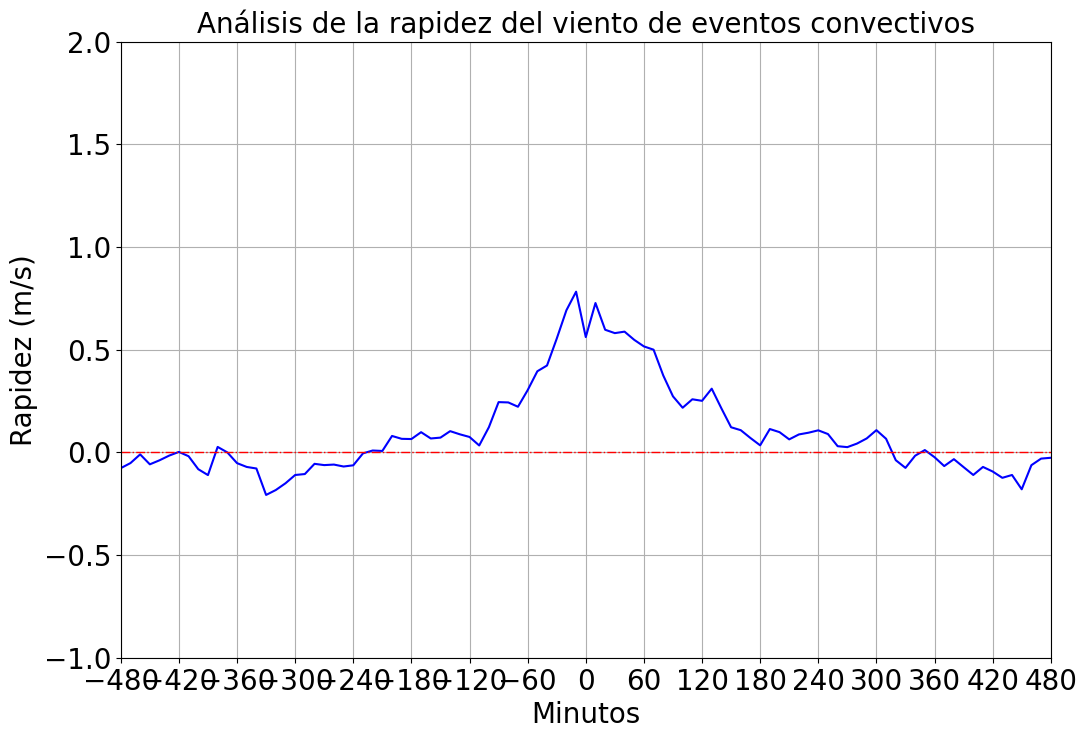

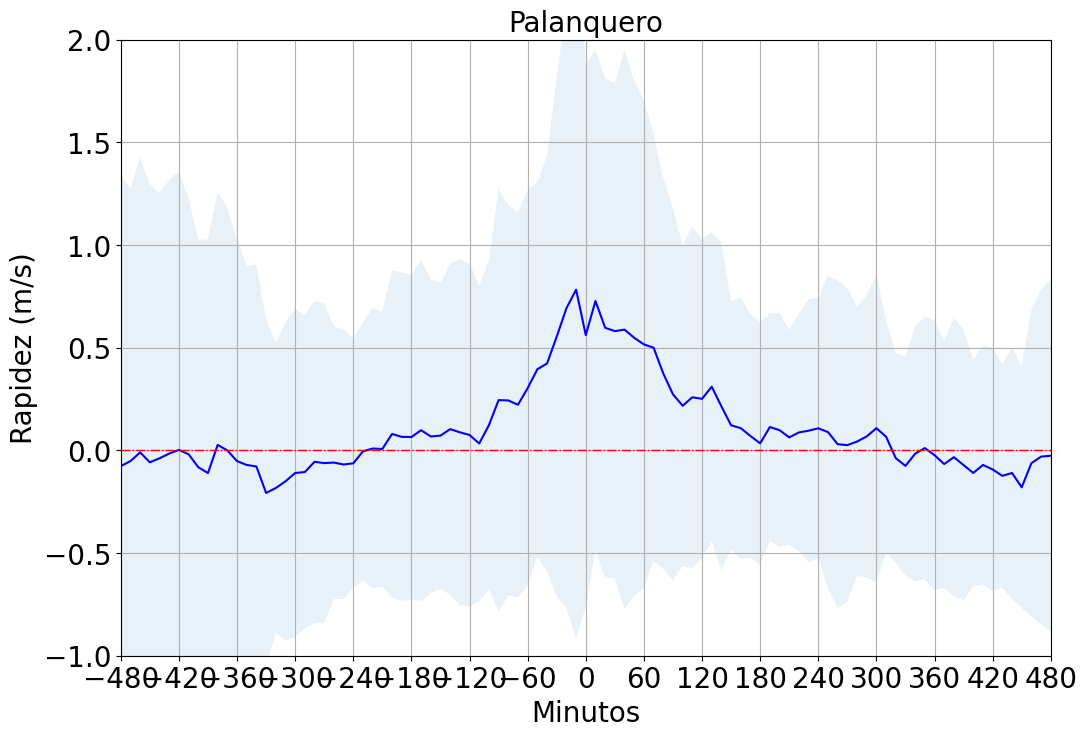

In [64]:
def plot_10m_interval_v2(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  # plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title(titulo, fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

def plot_dir_viento_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(range(0, 361, 45), fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'DIR_VIENTO' : {'title' : 'Análisis de la dirección del viento de eventos convectivos', 'name2save' : f'analisis_dir_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Dirección (°)'},
              'VEL_VIENTO' : {'title' : 'Análisis de la rapidez del viento de eventos convectivos', 'name2save' : f'analisis_vel_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
              'VEL_VIENTO_2' : {'title' : 'Palanquero', 'name2save' : f'analisis_vel_viento_std_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
             }

# key = 'DIR_VIENTO'
# plot_dir_viento_interval(dfCrossVientosGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit = [0, 360], has_std=False)

key = 'VEL_VIENTO'
plot_10m_interval_v2(dfCrossVientosGroup2, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=False)

key = 'VEL_VIENTO_2'
plot_10m_interval_v2(dfCrossVientosGroup2, 'VEL_VIENTO', dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=True)

## Anáisis de Percentiles

In [65]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
12411       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
12412       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
12413       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
12414       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
12415       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
12411        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
12412        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
12413        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
12414        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
12415        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
12411             0.660764  
12412             0.141434  
12413             0.421084  
12414             0.202349  
12415             0.579398  

[12416 rows x 10 columns]

In [66]:
def plot_percentil_interval(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  # plt.plot(df['FECHA_POS'], df[0.5], label = f"Percentil {0.5}")
  ## Gráfica del promedio
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)

  # plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)
  plt.legend()

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [67]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
12411       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
12412       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
12413       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
12414       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
12415       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
12411        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
12412        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
12413        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
12414        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
12415        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
12411             0.660764  
12412             0.141434  
12413             0.421084  
12414             0.202349  
12415             0.579398  

[12416 rows x 10 columns]

<ipython-input-68-8cbbe471a989>:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")


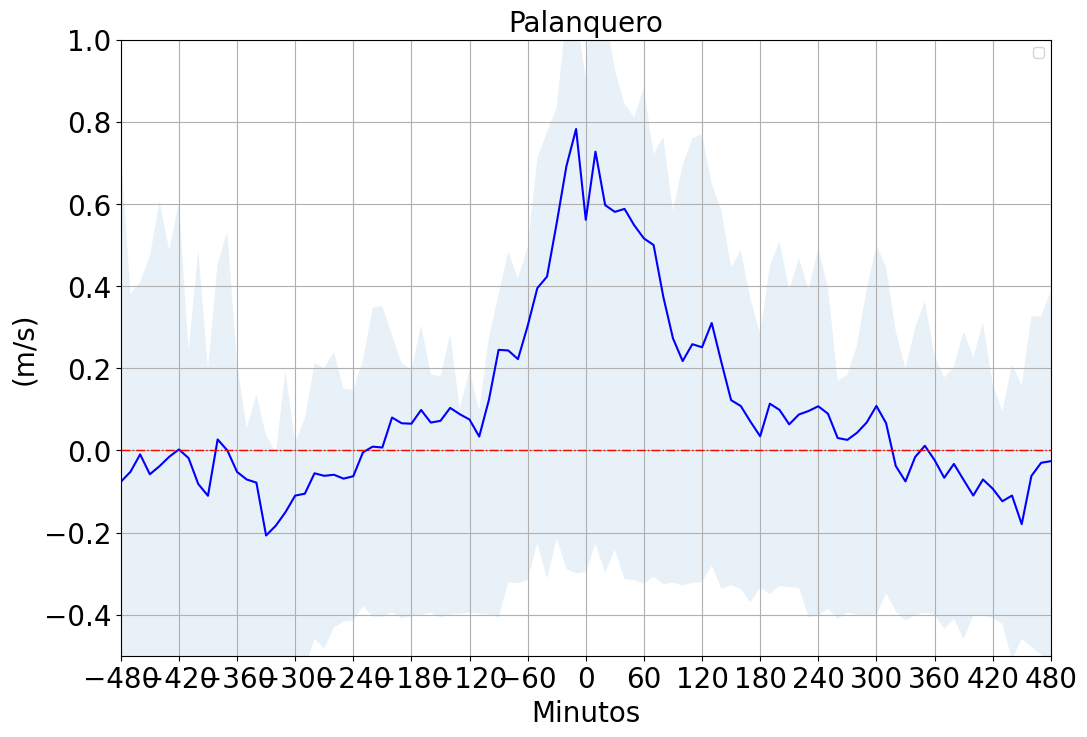

In [68]:
list_percentil = [.10, .20,.25, .50, .75, .80, .90]
dfPercentilViento = dfCrossVientos.groupby("FECHA_POS")['VEL_VIENTO_anomalia'].quantile(list_percentil).reset_index()
dfAggViento = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]})

dfPercentilViento = dfPercentilViento.pivot(index='FECHA_POS', columns='level_1')['VEL_VIENTO_anomalia'].reset_index()
dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")

dict_names = {'title' : 'Análisis de rapidez del viento',
              'name2save' : f'analisis_rapidez_viento_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_anomalia_mean.png',
              'ylabel' : '(m/s)'
              }

plot_percentil_interval(dfPercentilViento, [.25, .75], 'VEL_VIENTO_anomalia', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes, ylimit=[-.5, 1])

In [69]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
12411       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
12412       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
12413       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
12414       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
12415       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
12411        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
12412        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
12413        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
12414        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
12415        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
12411             0.660764  
12412             0.141434  
12413             0.421084  
12414             0.202349  
12415             0.579398  

[12416 rows x 10 columns]

# Análisis de viento por hora

In [70]:
dfCrossVientosHora = pd.merge(dfEventAn, df10m, on='FECHA', how = 'left')

dfCrossVientosHora
# dfCrossVientosHoraGroup = dfCrossVientosHora.groupby("FECHA_POS").agg({"X_VIENTO" : "mean", "Y_VIENTO" : "mean"}).reset_index()

dfCrossVientosHora['DIR_VIENTO'] = dfCrossVientosHora.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
dfCrossVientosHora['DIR_VIENTO'] = (dfCrossVientosHora['DIR_VIENTO'] + 180.0) % 360
dfCrossVientosHora['VEL_VIENTO'] = dfCrossVientosHora.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

dfCrossVientosHora

index              FECHA_EVENTO                 FECHA_MIN  MIN_T  \
0         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
1         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
2         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
3         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
4         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
...     ...                       ...                       ...    ...   
2171    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2172    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2173    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2174    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2175    127 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

         LON    LAT                      FECHA  FECHA_POS     FECHA_HORA  \
0    -74.836  5.627  2011-01-14 16:00:00-05:00       -8.0  2011-01-14 16   
1    -74.836  5.627  2011-01-14 17:00:00-05:00       -7.0  2011-01-14 17   
2    -74.836  5.627  2011-01-14 18:00:00-05:00       -6.0  2011-01-14 18   
3    -74.836  5.627  2011-01-14 19:00:00-05:00       -5.0  2011-01-14 19   
4    -74.836  5.627  2011-01-14 20:00:00-05:00       -4.0  2011-01-14 20   
...      ...    ...                        ...        ...            ...   
2171 -74.836  5.484  2017-12-29 04:00:00-05:00        4.0  2017-12-29 04   
2172 -74.836  5.484  2017-12-29 05:00:00-05:00        5.0  2017-12-29 05   
2173 -74.836  5.484  2017-12-29 06:00:00-05:00        6.0  2017-12-29 06   
2174 -74.836  5.484  2017-12-29 07:00:00-05:00        7.0  2017-12-29 07   
2175 -74.836  5.484  2017-12-29 08:00:00-05:00        8.0  2017-12-29 08   

      X_VIENTO  Y_VIENTO HORA   DIRVIENTO  VELVIENTO  DIR_VIENTO  VEL_VIENTO  
0    -0.008371 -0.114574   16  184.178717   0.114880    4.178717    0.114880  
1    -0.005520 -0.149800   17  182.110501   0.149901    2.110501    0.149901  
2    -0.003490 -0.133272   18  181.499962   0.133318    1.499962    0.133318  
3    -0.027756 -0.195051   19  188.098946   0.197016    8.098946    0.197016  
4    -0.035483 -0.139636   20  194.257519   0.144074   14.257519    0.144074  
...        ...       ...  ...         ...        ...         ...         ...  
2171  0.315911  0.395494   04   38.617059   0.506177  218.617059    0.506177  
2172  0.253255 -1.002975   05  165.828832   1.034454  345.828832    1.034454  
2173 -0.014317 -1.094360   06  180.749551   1.094453    0.749551    1.094453  
2174  0.165950 -0.855470   07  169.021692   0.871417  349.021692    0.871417  
2175 -0.392705 -0.380243   08  225.923677   0.546627   45.923677    0.546627  

[2176 rows x 16 columns]

In [71]:
def plot_windrose(df, title, path_to_save):
  ax = WindroseAxes.from_ax()

  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 5, 0.5), edgecolor='white', cmap=cm.cool)
  ax.set_legend(loc = 3)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
  plt.title(title)
  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
  plt.show()

In [72]:
posHoras = set(list(dfCrossVientosHora['FECHA_POS']))
posHoras

{-8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0}

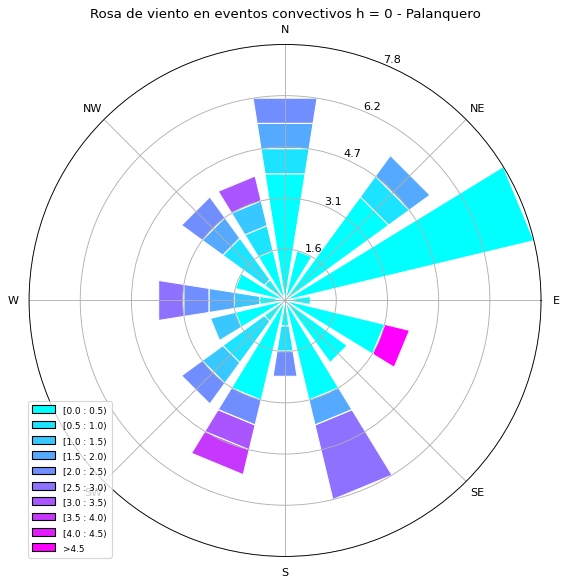

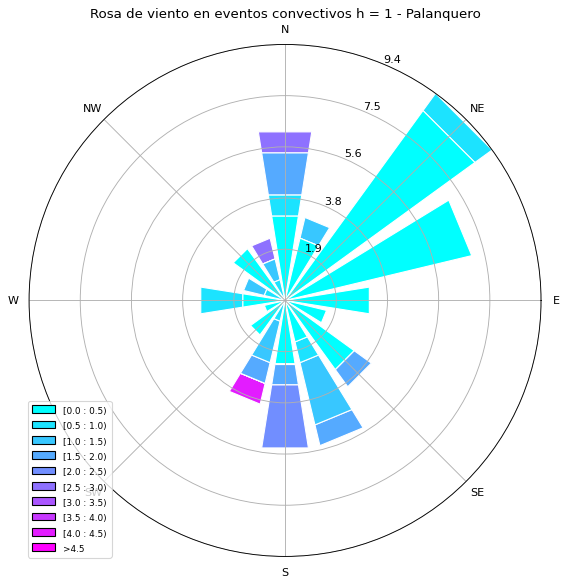

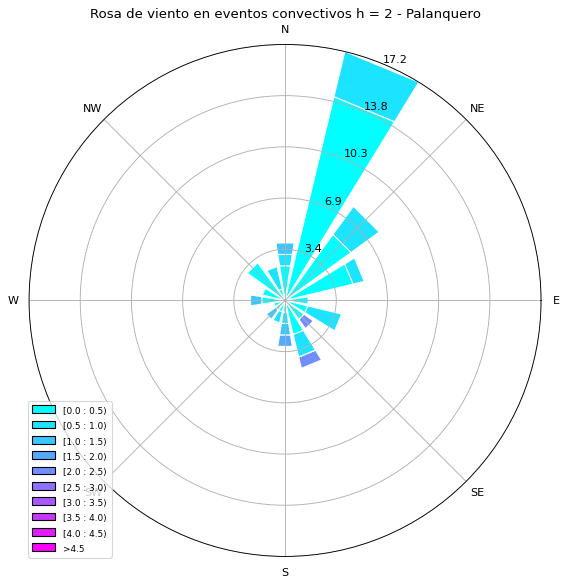

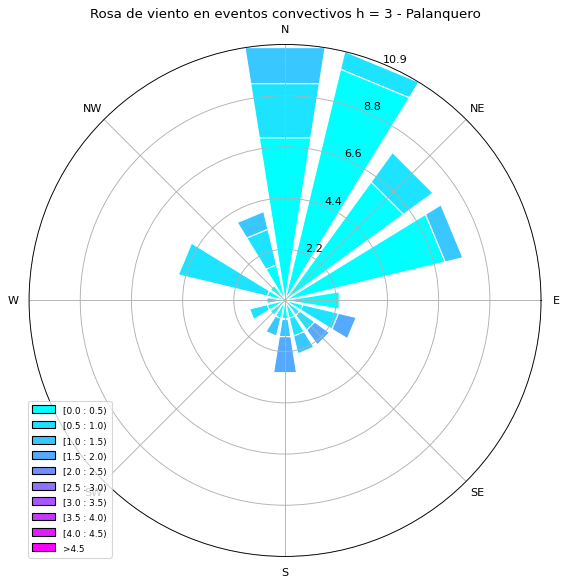

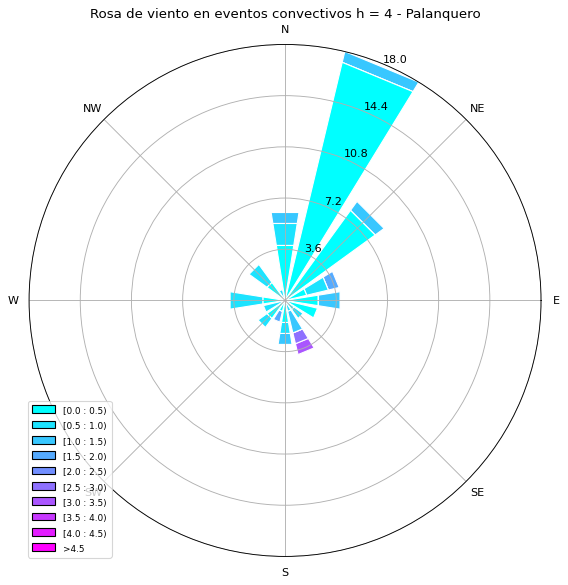

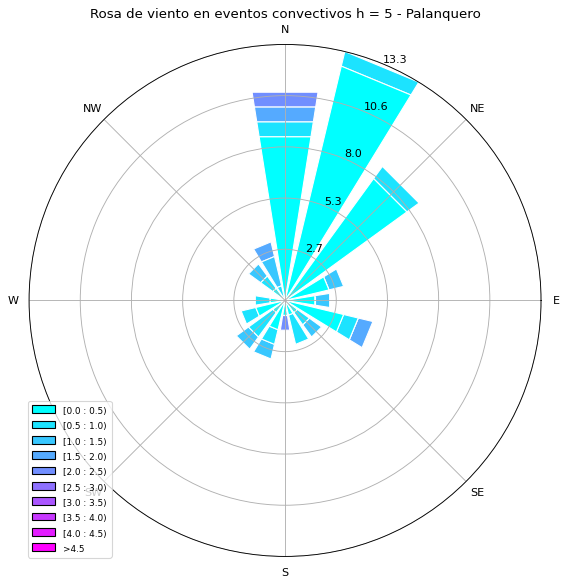

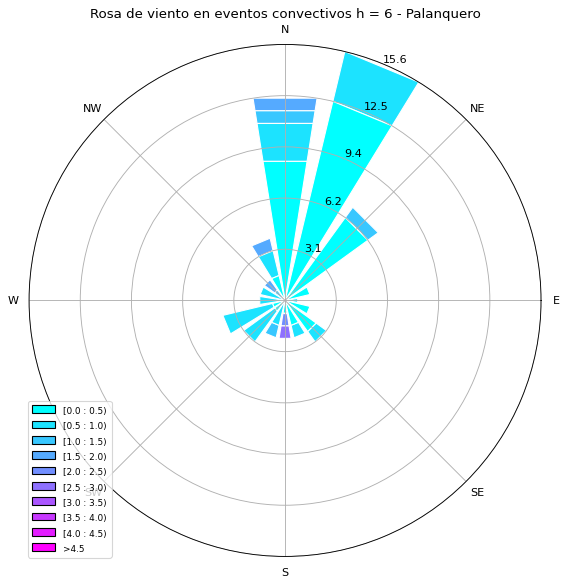

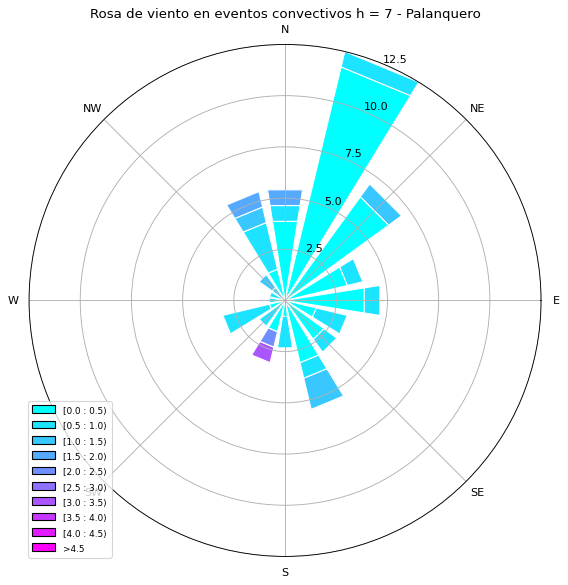

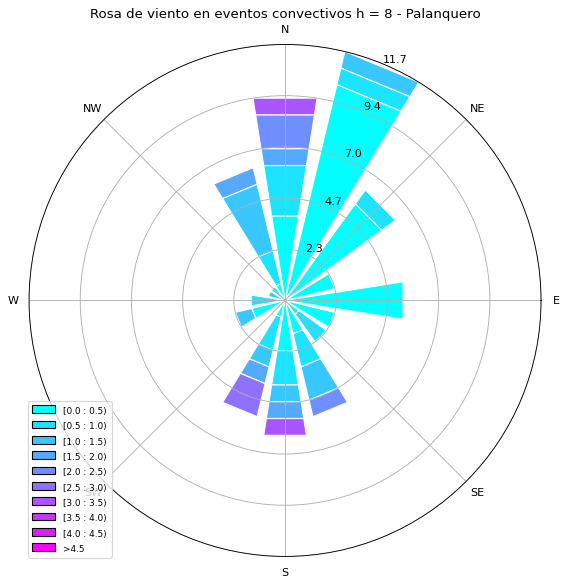

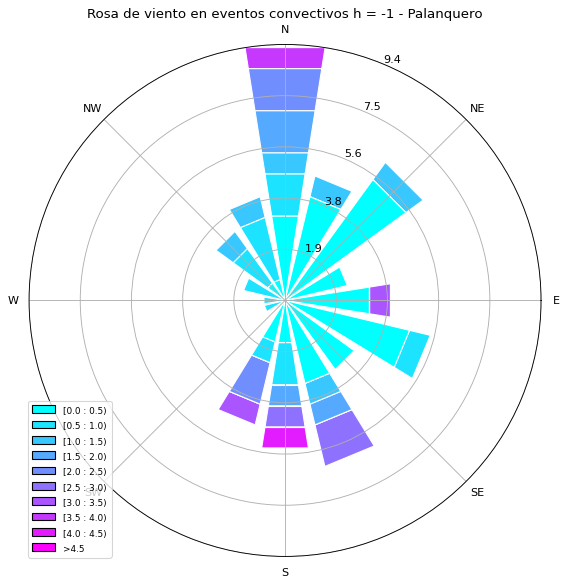

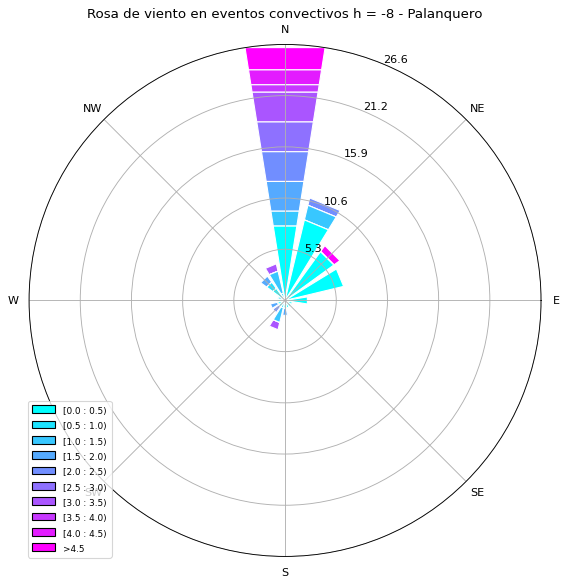

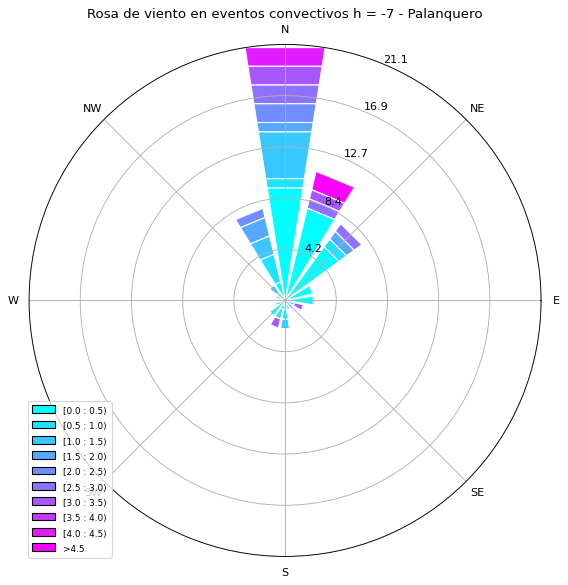

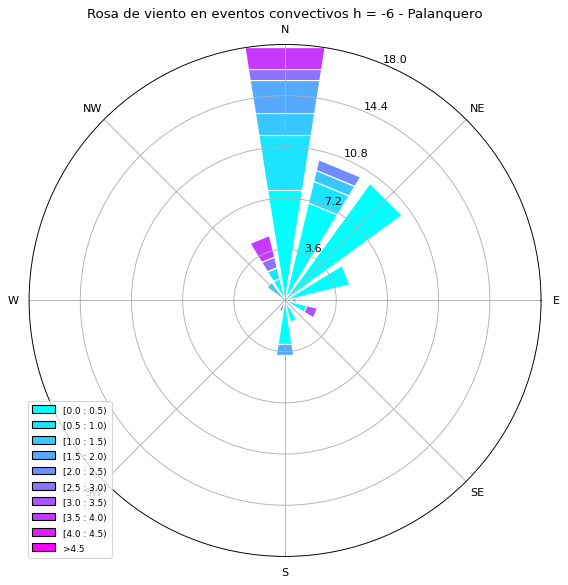

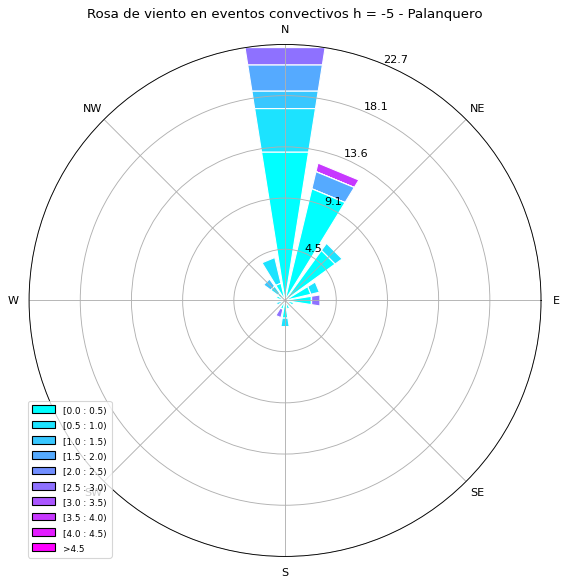

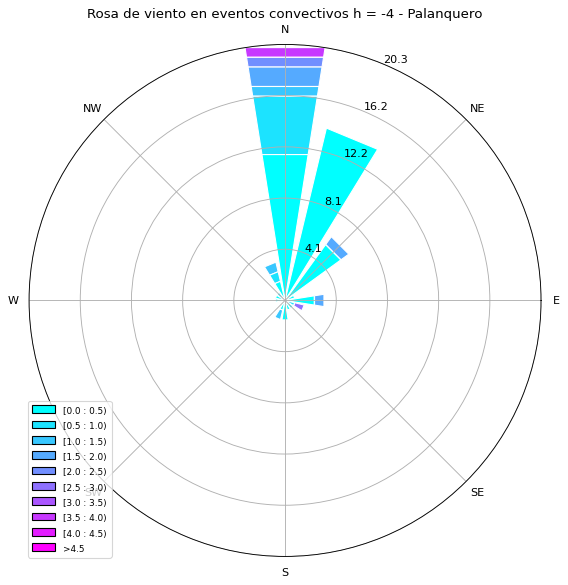

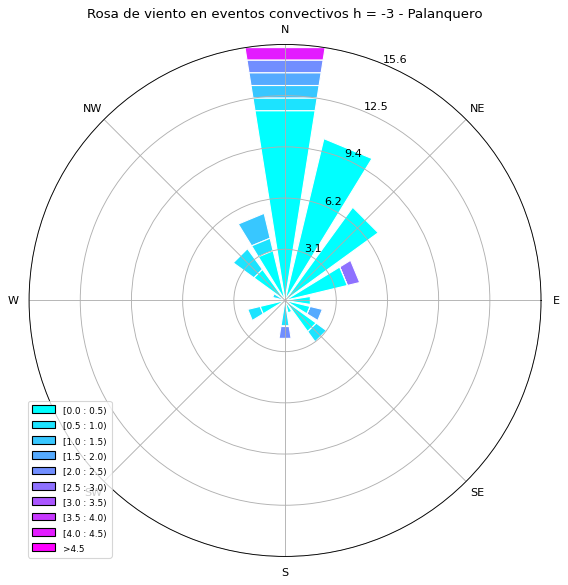

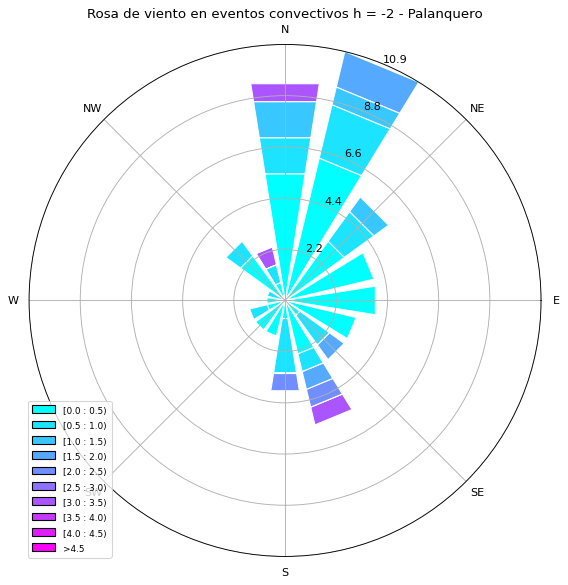

In [73]:
for hora in posHoras:
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'Rosa de viento en eventos convectivos h = {int(hora)} - {NOMBRE_ESTACION.capitalize()}'
  path_to_save = f'windrose_eventos_convectivos_hora_20h_7h_{int(hora)}_{NOMBRE_ESTACION.lower()}.png'

  plot_windrose(dft, title, path_to_save)

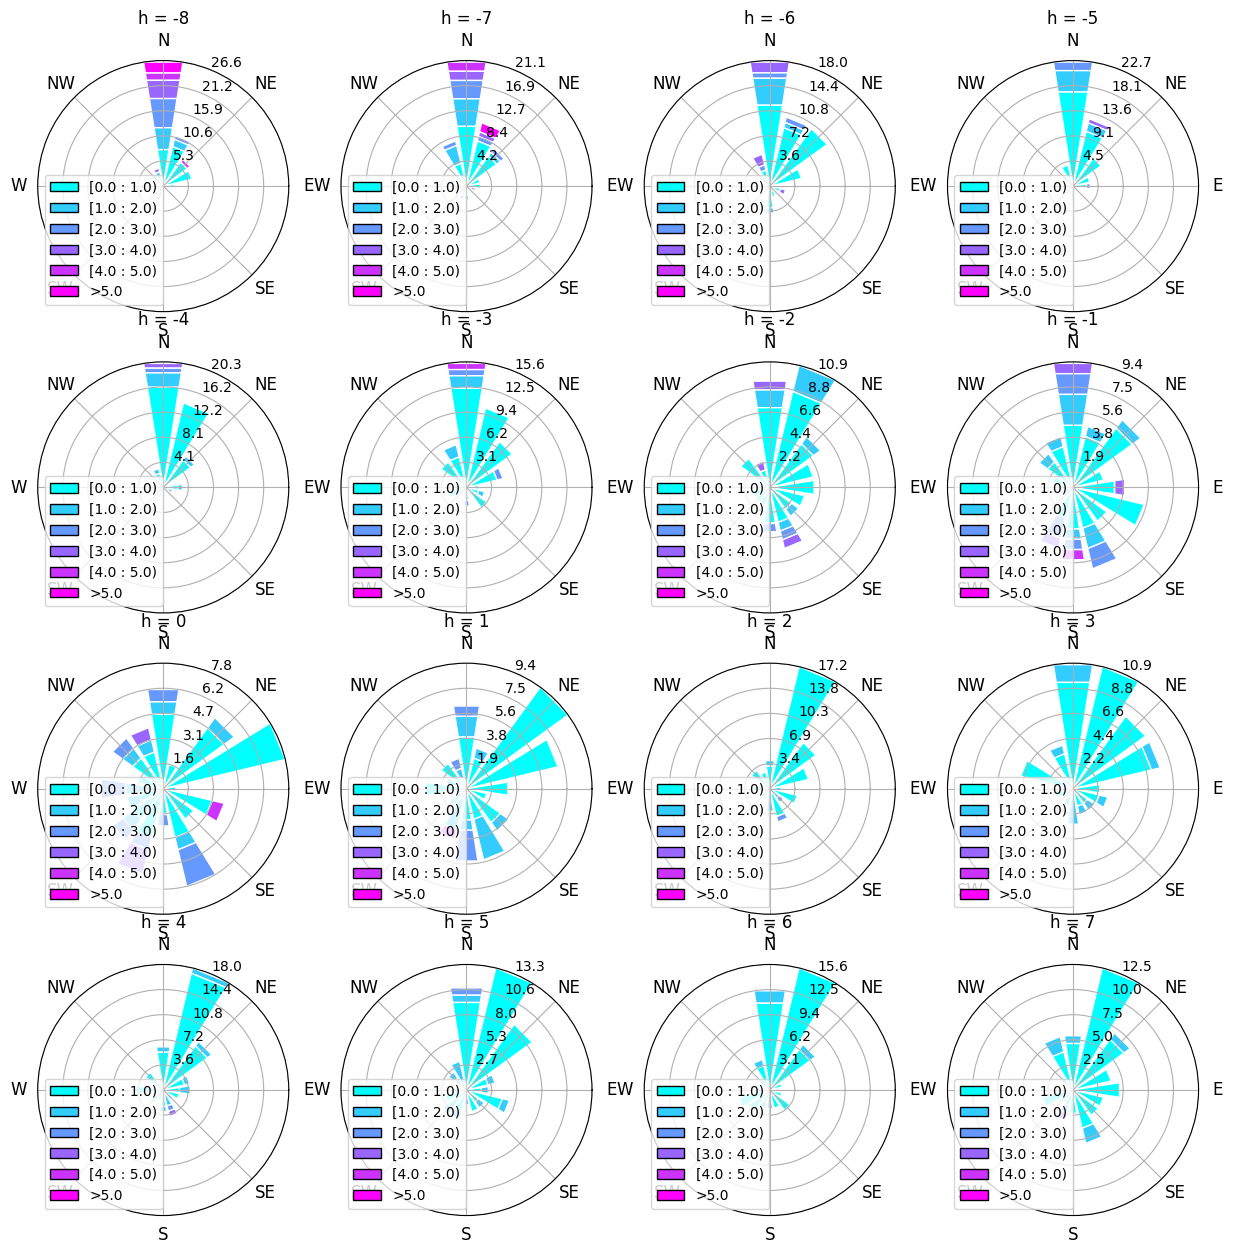

In [74]:
def plot_windrose_2(df, title, ax):
  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize= 10)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize= 12)
  ax.set_title(title)


fig, axs = plt.subplots(4, 4,figsize=(15,15),  subplot_kw=dict(projection="windrose"))
horas = list(posHoras)
horas.sort()

for ax, hora in zip(axs.reshape(16), horas):
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'h = {int(hora)}'
  plot_windrose_2(dft, title, ax)

path_to_save = f'subplot_vientos_20h_7h_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
plt.show()

# Gráficos multivariables en único Plot

In [75]:
# fig, ax = plt.subplots()
# ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
# ax.set_ylim(-0.7, 0.7)

# ax2=ax.twinx()
# ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PWV_anomalia', 'mean')], c = 'green')

# ax3=ax.twinx()
# ax3.spines['right'].set_position(('axes', 1.2))
# ax3.plot(dfCrossPrecGroup['FECHA_POS']/60.0, dfCrossPrecGroup[('PREC', 'mean')], c = 'black')
# ax3.set_ylim(0, 5)

# ax.set_xlim(-4, 4)
# ax.grid()

# ax.set_ylabel("Temperatura (°C)")
# ax2.set_ylabel("Vapor de Agua (mm)")
# ax3.set_ylabel("Precipitación (mm)")
# ax.set_xlabel("Hora (h)")

# path_to_save = f'temp_vs_pwv_vs_prec_anomalias_{NOMBRE_ESTACION}.png'
# plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )

In [76]:
# fig, ax = plt.subplots()
# ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
# ax.set_ylim(-0.7, 0.7)

# ax2=ax.twinx()
# ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PRESION_anomalia', 'mean')], c = 'green')

# ax3=ax.twinx()
# ax3.spines['right'].set_position(('axes', 1.2))
# ax3.plot(dfCrossVientosGroup2['FECHA_POS']/60.0, dfCrossVientosGroup['VEL_VIENTO'], c = 'black')
# # ax3.set_ylim(0, 0.5)

# ax.set_xlim(-4, 4)
# ax.grid()

# ax.set_ylabel("Temperatura (°C)")
# ax2.set_ylabel("Presión (hPa)")
# ax3.set_ylabel("Velocidad del viento (m/s)")
# ax.set_xlabel("Hora (h)")

# path_to_save = f'temp_vs_pres_vs_velviento_anomalias_{NOMBRE_ESTACION}.png'
# plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )